In [1]:
# Import dataframe for Electricity cost without calculating DAC cost
# Compute DAC cost for different DAC CAPEX: $1500-8700
# Change O&M between 1-3
# Change lifetime 15-25

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
start_col = 1
start_ind = 3
#No DAC
no_dac = pd.read_excel(io='C:/Users/Rei/Desktop/Renewable/LCOE_netelec.xlsx',
                                   sheet_name='No DAC')
no_dac = no_dac.iloc[start_ind:, start_col:]
#Net zero 43
zero_43 = pd.read_excel(io='C:/Users/Rei/Desktop/Renewable/LCOE_netelec.xlsx',
                                   sheet_name='Zero 43')
zero_43 = zero_43.iloc[start_ind:, start_col:]
#Net zero 101
zero_101 = pd.read_excel(io='C:/Users/Rei/Desktop/Renewable/LCOE_netelec.xlsx',
                                   sheet_name='Zero 101')
zero_101 = zero_101.iloc[start_ind:, start_col:]

#Net zero 162
zero_162 = pd.read_excel(io='C:/Users/Rei/Desktop/Renewable/LCOE_netelec.xlsx',
                                   sheet_name='Zero 162')
zero_162 = zero_162.iloc[start_ind:, start_col:]
#Net negative 43
neg_43 = pd.read_excel(io='C:/Users/Rei/Desktop/Renewable/LCOE_netelec.xlsx',
                                   sheet_name='Neg_43')
neg_43 = neg_43.iloc[start_ind:, start_col:]

#Net negative 101
neg_101 = pd.read_excel(io='C:/Users/Rei/Desktop/Renewable/LCOE_netelec.xlsx',
                                   sheet_name='Neg_101')
neg_101 = neg_101.iloc[start_ind:, start_col:]
#Net negative 162
neg_162 = pd.read_excel(io='C:/Users/Rei/Desktop/Renewable/LCOE_netelec.xlsx',
                                   sheet_name='Neg_162')
neg_162 = neg_162.iloc[start_ind:, start_col:]
#Net negative 162 :100 years
neg_162_100yr = pd.read_excel(io='C:/Users/Rei/Desktop/Renewable/LCOE_netelec.xlsx',
                                   sheet_name='Neg_162 (100yr)')
neg_162_100yr = neg_162_100yr.iloc[start_ind:, start_col:]

In [3]:
# Array of CAPEX
CAPEX_arr = np.arange(1500,8800,100)

In [4]:
# Calculate Annualised cost for DAC
currency = 1/1.27 #USD/GBP=0.79
discount_rate = 0.05
opex = 0.02
life = 20
Annual_cost = CAPEX_arr * currency * 10**6 * (discount_rate/(1-(1/(1+discount_rate))**life)+opex)

In [5]:
# no dac
nodacdemand = 575.35
nodaccost = []
# Find the total electricity costs and reshape the array for each DAC CAPEX
for i in range(0,48):
    cost = no_dac.iloc[i,5:11].sum()
    nodaccost.append(cost)
nodaccost = np.array(nodaccost).astype(float)

In [6]:
zero_43 = zero_43.drop(columns=["Unnamed: 14","Unnamed: 16","Unnamed: 17","Unnamed: 18"], axis=1)
neg_43 = neg_43.drop(columns=["Unnamed: 14","Unnamed: 16","Unnamed: 17","Unnamed: 18"], axis=1)
zero_101 = zero_101.drop(columns=["Unnamed: 14","Unnamed: 16","Unnamed: 17","Unnamed: 18"], axis=1)
neg_101 = neg_101.drop(columns=["Unnamed: 14","Unnamed: 16","Unnamed: 17","Unnamed: 18"], axis=1)
zero_162 = zero_162.drop(columns=["Unnamed: 14","Unnamed: 16","Unnamed: 17","Unnamed: 18"], axis=1)
neg_162 = neg_162.drop(columns=["Unnamed: 14","Unnamed: 16","Unnamed: 17","Unnamed: 18"], axis=1)
neg_162_100yr = neg_162_100yr.drop(columns=["Unnamed: 14","Unnamed: 16","Unnamed: 17","Unnamed: 18"], axis=1)

In [7]:
# net zero 43
zero43demand = 597.0204
zero43cost = []
# Find the total electricity costs and reshape the array for each DAC CAPEX
for j in range(0,len(CAPEX_arr)):
    for i in range(0,46):
        cost = zero_43.iloc[i,5:11].sum() + zero_43.iloc[i,13] + zero_43.iloc[i,11]/100*zero_43.iloc[i,12]*Annual_cost[j]/(zero43demand*0.001)/10**9
        zero43cost.append(cost)
zero43cost = np.array(zero43cost).astype(float)
zero43cost = zero43cost.reshape(len(CAPEX_arr),46)

for j in range(0,len(CAPEX_arr)):
    temp_df = pd.DataFrame({f'{CAPEX_arr[j]}': zero43cost[j]})
    temp_df.index = pd.Index(range(3,49))
    zero_43 = pd.concat([zero_43, temp_df], axis=1)


# net negative 43
neg43demand = 795.1825
neg43cost = []
# Find the total electricity costs and reshape the array for each DAC CAPEX
for j in range(0,len(CAPEX_arr)):
    for i in range(0,37):
        cost = neg_43.iloc[i,5:11].sum() + neg_43.iloc[i,13] + neg_43.iloc[i,11]/100*neg_43.iloc[i,12]*Annual_cost[j]/(neg43demand*0.001)/10**9
        neg43cost.append(cost)
neg43cost = np.array(neg43cost).astype(float)
neg43cost = neg43cost.reshape(len(CAPEX_arr),37)

for j in range(0,len(CAPEX_arr)):
    temp_df = pd.DataFrame({f'{CAPEX_arr[j]}': neg43cost[j]})
    temp_df.index = pd.Index(range(3,40))
    neg_43 = pd.concat([neg_43, temp_df], axis=1)

In [8]:
# net zero 101
zero101demand = 618.7265
zero101cost = []
# Find the total electricity costs and reshape the array for each DAC CAPEX
for j in range(0,len(CAPEX_arr)):
    for i in range(0,42):
        cost = zero_101.iloc[i,5:11].sum() + zero_101.iloc[i,13] + zero_101.iloc[i,11]/100*zero_101.iloc[i,12]*Annual_cost[j]/(zero101demand*0.001)/10**9
        zero101cost.append(cost)
zero101cost = np.array(zero101cost).astype(float)
zero101cost = zero101cost.reshape(len(CAPEX_arr),42)

for j in range(0,len(CAPEX_arr)):
    temp_df = pd.DataFrame({f'{CAPEX_arr[j]}': zero101cost[j]})
    temp_df.index = pd.Index(range(3,45))
    zero_101 = pd.concat([zero_101, temp_df], axis=1)


# net negative 101
neg101demand = 1012.2138
neg101cost = []
# Find the total electricity costs and reshape the array for each DAC CAPEX
for j in range(0,len(CAPEX_arr)):
    for i in range(0,71):
        cost = neg_101.iloc[i,5:11].sum() + neg_101.iloc[i,13] + neg_101.iloc[i,11]/100*neg_101.iloc[i,12]*Annual_cost[j]/(neg101demand*0.001)/10**9
        neg101cost.append(cost)
neg101cost = np.array(neg101cost).astype(float)
neg101cost = neg101cost.reshape(len(CAPEX_arr),71)

for j in range(0,len(CAPEX_arr)):
    temp_df = pd.DataFrame({f'{CAPEX_arr[j]}': neg101cost[j]})
    temp_df.index = pd.Index(range(3,74))
    neg_101 = pd.concat([neg_101, temp_df], axis=1)

In [9]:
# net zero 162
zero162demand = 641.5553
zero162cost = []
# Find the total electricity costs and reshape the array for each DAC CAPEX
for j in range(0,len(CAPEX_arr)):
    for i in range(0,35):
        cost = zero_162.iloc[i,5:11].sum() + zero_162.iloc[i,13] + zero_162.iloc[i,11]/100*zero_162.iloc[i,12]*Annual_cost[j]/(zero162demand*0.001)/10**9
        zero162cost.append(cost)
zero162cost = np.array(zero162cost).astype(float)
zero162cost = zero162cost.reshape(len(CAPEX_arr),35)

for j in range(0,len(CAPEX_arr)):
    temp_df = pd.DataFrame({f'{CAPEX_arr[j]}': zero162cost[j]})
    temp_df.index = pd.Index(range(3,38))
    zero_162 = pd.concat([zero_162, temp_df], axis=1)


# net negative 162
neg162demand = 1240.4709
neg162cost = []
# Find the total electricity costs and reshape the array for each DAC CAPEX
for j in range(0,len(CAPEX_arr)):
    for i in range(0,107):
        cost = neg_162.iloc[i,5:11].sum() + neg_162.iloc[i,13] + neg_162.iloc[i,11]/100*neg_162.iloc[i,12]*Annual_cost[j]/(neg162demand*0.001)/10**9
        neg162cost.append(cost)
neg162cost = np.array(neg162cost).astype(float)
neg162cost = neg162cost.reshape(len(CAPEX_arr),107)

for j in range(0,len(CAPEX_arr)):
    temp_df = pd.DataFrame({f'{CAPEX_arr[j]}': neg162cost[j]})
    temp_df.index = pd.Index(range(3,110))
    neg_162 = pd.concat([neg_162, temp_df], axis=1)

In [10]:
# net negative 162 :100yrs
neg162demand100yr = 938.5195
neg162cost100yr = []
# Find the total electricity costs and reshape the array for each DAC CAPEX
for j in range(0,len(CAPEX_arr)):
    for i in range(0,77):
        cost = neg_162_100yr.iloc[i,5:11].sum() + neg_162_100yr.iloc[i,13] + neg_162_100yr.iloc[i,11]/100*neg_162_100yr.iloc[i,12]*Annual_cost[j]/(neg162demand100yr*0.001)/10**9
        neg162cost100yr.append(cost)
neg162cost100yr = np.array(neg162cost100yr).astype(float)
neg162cost100yr = neg162cost100yr.reshape(len(CAPEX_arr),77)

for j in range(0,len(CAPEX_arr)):
    temp_df = pd.DataFrame({f'{CAPEX_arr[j]}': neg162cost100yr[j]})
    temp_df.index = pd.Index(range(3,80))
    neg_162_100yr = pd.concat([neg_162_100yr, temp_df], axis=1)

### Summary of Capcities for CAPEX:(1500,5000,8700) for minimal cost

##### Net zero 43

Text(0.5, 1.0, 'Capacities: Net Zero (43) & CAPEX=$8700')

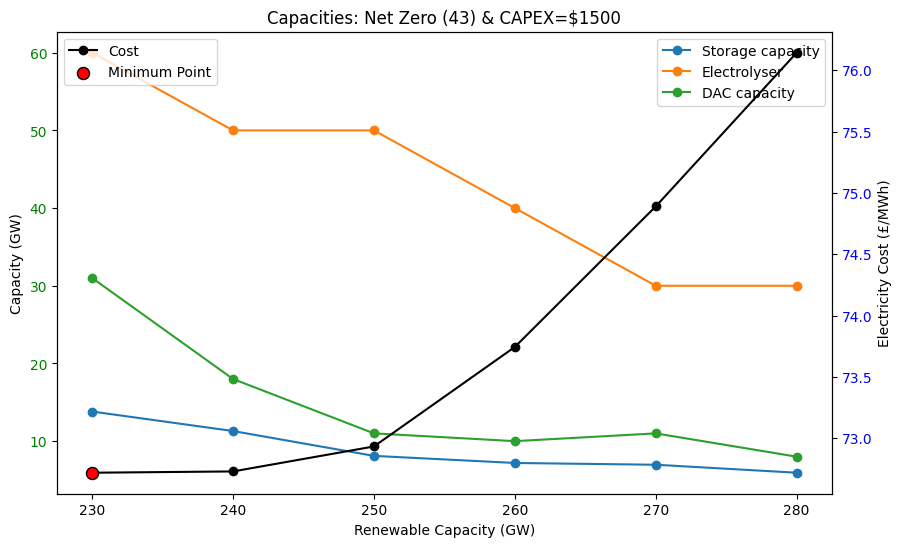

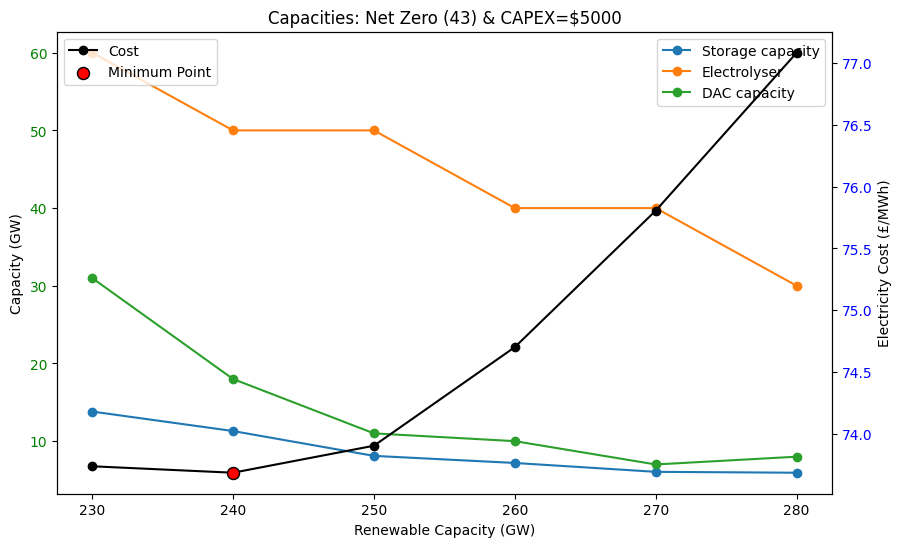

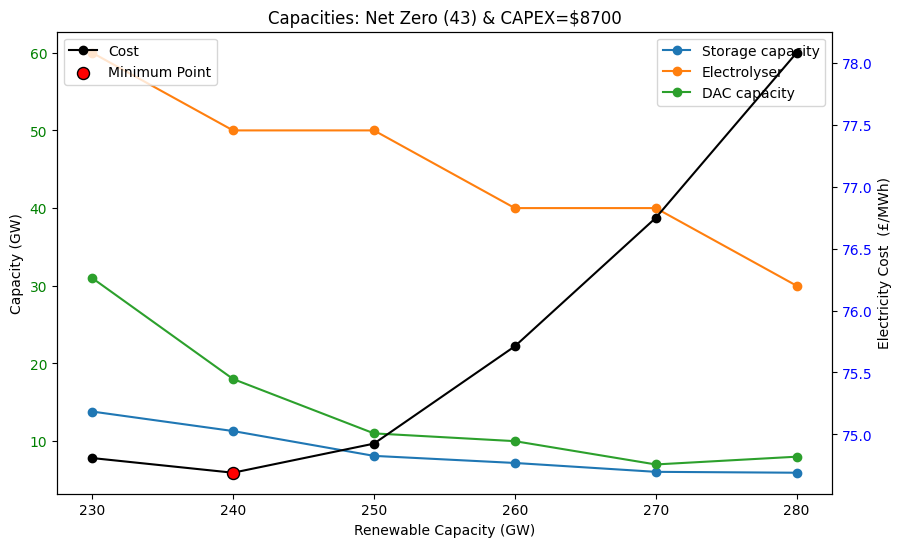

In [58]:
# Net zero 43 & $1500
df = zero_43
min_idx = df.groupby('Unnamed: 2')['1500'].idxmin()
zero_43_red = df.loc[min_idx].reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=((10,6)))
x = np.arange(230,290,10)

#ax1.plot(x,neg_101_red.iloc[:,1]/3, marker='o', label='Renewable capacity, scaled by 1/3') # Renewable
ax1.plot(x,zero_43_red.iloc[:,2]*1000/24/365,marker='o', label='Storage capacity') # Storage
ax1.plot(x,zero_43_red.iloc[:,3],marker='o', label='Electrolyser') #Electrolyser
ax1.plot(x,zero_43_red.iloc[:,12], marker='o', label='DAC capacity') # DAC

ax1.set_xlabel('Renewable Capacity (GW)')
ax1.set_ylabel('Capacity (GW)')
ax1.tick_params(axis='y', labelcolor='g')
ax1.legend()#loc = 'upper left')

ax2 = ax1.twinx()
ax2.plot(x,zero_43_red['1500'], color = 'k', marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = zero_43_red['1500']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Minimum Point', zorder=1)
ax2.set_ylabel('Electricity Cost (£/MWh)')
ax2.tick_params(axis='y', labelcolor='b')
ax2.legend()#loc = 'upper left')

plt.title('Capacities: Net Zero (43) & CAPEX=$1500')

# Net zero 43 & $5000
df = zero_43
min_idx = df.groupby('Unnamed: 2')['5000'].idxmin()
zero_43_red = df.loc[min_idx].reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=((10,6)))

#ax1.plot(x,neg_101_red.iloc[:,1]/3, marker='o', label='Renewable capacity, scaled by 1/3') # Renewable
ax1.plot(x,zero_43_red.iloc[:,2]*1000/24/365,marker='o', label='Storage capacity') # Storage
ax1.plot(x,zero_43_red.iloc[:,3],marker='o', label='Electrolyser') #Electrolyser
ax1.plot(x,zero_43_red.iloc[:,12], marker='o', label='DAC capacity') # DAC

ax1.set_xlabel('Renewable Capacity (GW)')
ax1.set_ylabel('Capacity (GW)')
ax1.tick_params(axis='y', labelcolor='g')
ax1.legend()#loc = 'upper left')

ax2 = ax1.twinx()
ax2.plot(x,zero_43_red['5000'], color = 'k', marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = zero_43_red['5000']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Minimum Point', zorder=1)
ax2.set_ylabel('Electricity Cost (£/MWh)')
ax2.tick_params(axis='y', labelcolor='b')
ax2.legend()#loc = 'upper left')

plt.title('Capacities: Net Zero (43) & CAPEX=$5000')

# Net zero 43 & $8700
df = zero_43
min_idx = df.groupby('Unnamed: 2')['8700'].idxmin()
zero_43_red = df.loc[min_idx].reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=((10,6)))

#ax1.plot(x,neg_101_red.iloc[:,1]/3, marker='o', label='Renewable capacity, scaled by 1/3') # Renewable
ax1.plot(x,zero_43_red.iloc[:,2]*1000/24/365,marker='o', label='Storage capacity') # Storage
ax1.plot(x,zero_43_red.iloc[:,3],marker='o', label='Electrolyser') #Electrolyser
ax1.plot(x,zero_43_red.iloc[:,12], marker='o', label='DAC capacity') # DAC

ax1.set_xlabel('Renewable Capacity (GW)')
ax1.set_ylabel('Capacity (GW)')
ax1.tick_params(axis='y', labelcolor='g')
ax1.legend()#loc = 'upper left')

ax2 = ax1.twinx()
ax2.plot(x,zero_43_red['8700'], color = 'k', marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = zero_43_red['8700']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Minimum Point', zorder=1)
ax2.set_ylabel('Electricity Cost  (£/MWh)')
ax2.tick_params(axis='y', labelcolor='b')
ax2.legend()#loc = 'upper left')

plt.title('Capacities: Net Zero (43) & CAPEX=$8700')

##### Net zero 101

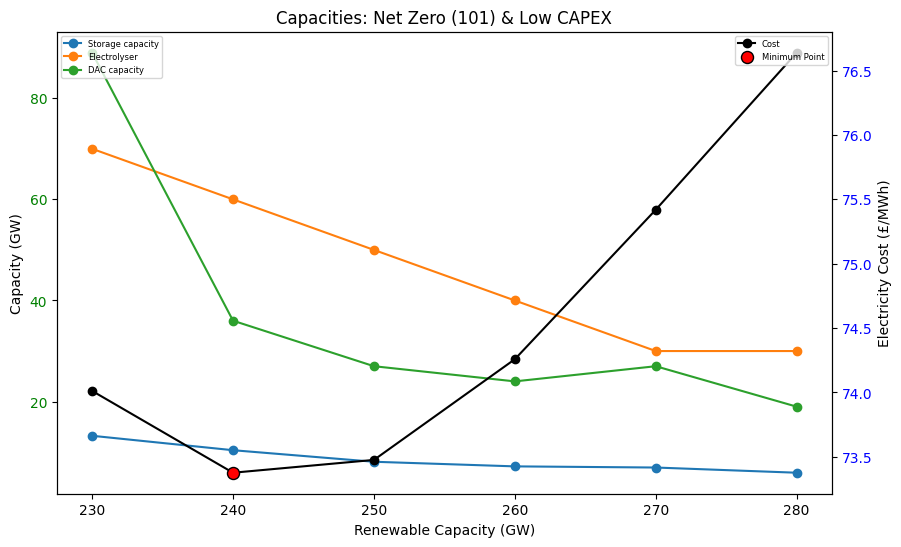

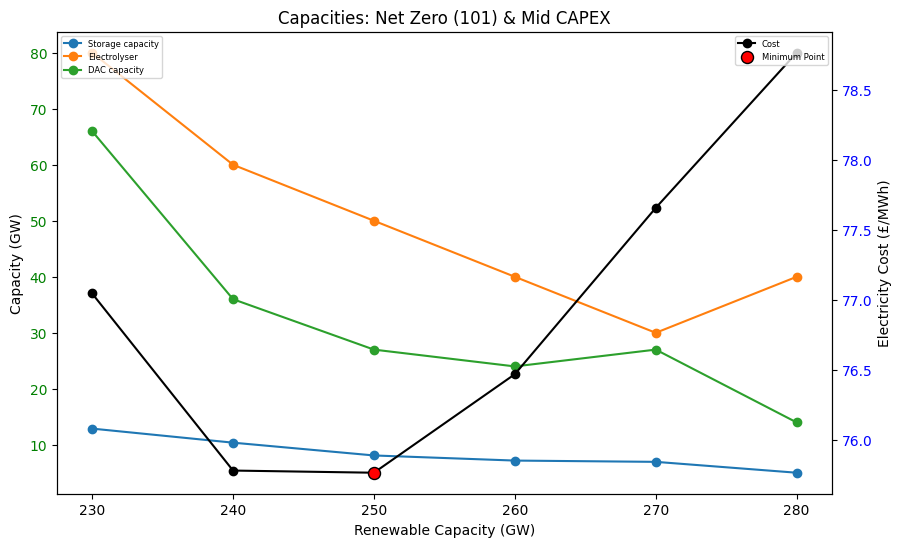

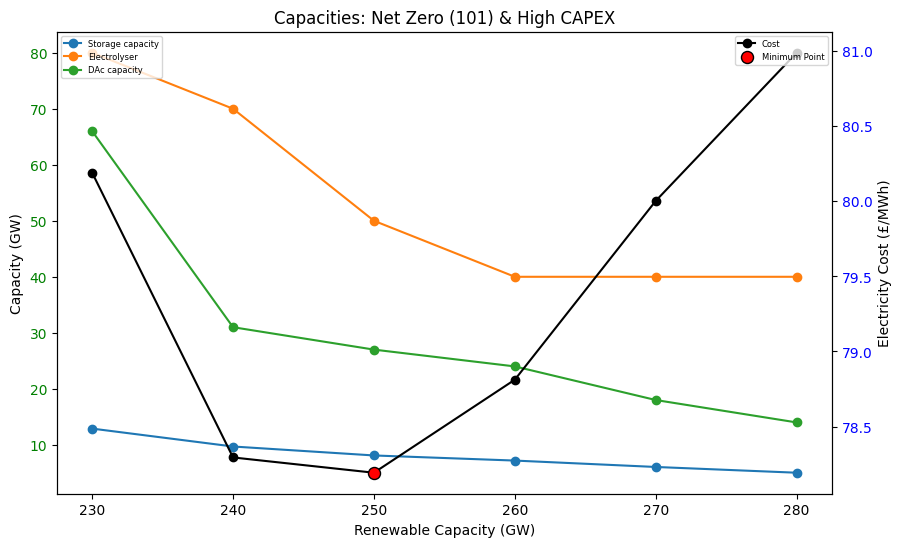

In [80]:
# Net zero 101 & $1500
df = zero_101
min_idx = df.groupby('Unnamed: 2')['1500'].idxmin()
zero_101_red = df.loc[min_idx].reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=((10,6)))
x = np.arange(230,290,10)

#ax1.plot(x,neg_101_red.iloc[:,1]/3, marker='o', label='Renewable capacity, scaled by 1/3') # Renewable
ax1.plot(x,zero_101_red.iloc[:,2]*1000/24/365,marker='o', label='Storage capacity') # Storage
ax1.plot(x,zero_101_red.iloc[:,3],marker='o', label='Electrolyser') #Electrolyser
ax1.plot(x,zero_101_red.iloc[:,12], marker='o', label='DAC capacity') # DAC

ax1.set_xlabel('Renewable Capacity (GW)')
ax1.set_ylabel('Capacity (GW)')
ax1.tick_params(axis='y', labelcolor='g')
ax1.legend(loc = 'upper left',fontsize=6)

ax2 = ax1.twinx()
ax2.plot(x,zero_101_red['1500'], color = 'k', marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = zero_101_red['1500']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Minimum Point', zorder=1)
ax2.set_ylabel('Electricity Cost (£/MWh)')
ax2.tick_params(axis='y', labelcolor='b')
ax2.legend(loc = 'upper right',fontsize=6)

plt.title('Capacities: Net Zero (101) & Low CAPEX')
plt.savefig("Zero1500", bbox_inches='tight')

# Net zero 101 & $5000
df = zero_101
min_idx = df.groupby('Unnamed: 2')['5000'].idxmin()
zero_101_red = df.loc[min_idx].reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=((10,6)))

#ax1.plot(x,neg_101_red.iloc[:,1]/3, marker='o', label='Renewable capacity, scaled by 1/3') # Renewable
ax1.plot(x,zero_101_red.iloc[:,2]*1000/24/365,marker='o', label='Storage capacity') # Storage
ax1.plot(x,zero_101_red.iloc[:,3],marker='o', label='Electrolyser') #Electrolyser
ax1.plot(x,zero_101_red.iloc[:,12], marker='o', label='DAC capacity') # DAC

ax1.set_xlabel('Renewable Capacity (GW)')
ax1.set_ylabel('Capacity (GW)')
ax1.tick_params(axis='y', labelcolor='g')
ax1.legend(loc = 'upper left',fontsize=6)

ax2 = ax1.twinx()
ax2.plot(x,zero_101_red['5000'], color = 'k', marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = zero_101_red['5000']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Minimum Point', zorder=1)
ax2.set_ylabel('Electricity Cost (£/MWh)')
ax2.tick_params(axis='y', labelcolor='b')
ax2.legend(loc = 'upper right',fontsize=6)

plt.title('Capacities: Net Zero (101) & Mid CAPEX')
plt.savefig("Zero5000", bbox_inches='tight')

# Net zero 101 & $8700
df = zero_101
min_idx = df.groupby('Unnamed: 2')['8700'].idxmin()
zero_101_red = df.loc[min_idx].reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=((10,6)))

#ax1.plot(x,neg_101_red.iloc[:,1]/3, marker='o', label='Renewable capacity, scaled by 1/3') # Renewable
ax1.plot(x,zero_101_red.iloc[:,2]*1000/24/365,marker='o', label='Storage capacity') # Storage
ax1.plot(x,zero_101_red.iloc[:,3],marker='o', label='Electrolyser') #Electrolyser
ax1.plot(x,zero_101_red.iloc[:,12], marker='o', label='DAc capacity') # DAC

ax1.set_xlabel('Renewable Capacity (GW)')
ax1.set_ylabel('Capacity (GW)')
ax1.tick_params(axis='y', labelcolor='g')
ax1.legend(loc = 'upper left',fontsize=6)

ax2 = ax1.twinx()
ax2.plot(x,zero_101_red['8700'], color = 'k', marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = zero_101_red['8700']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Minimum Point', zorder=1)
ax2.set_ylabel('Electricity Cost (£/MWh)')
ax2.tick_params(axis='y', labelcolor='b')
ax2.legend(loc = 'upper right',fontsize=6)

plt.title('Capacities: Net Zero (101) & High CAPEX')
plt.savefig("Zero8700", bbox_inches='tight')

###### Net zero 162

Text(0.5, 1.0, 'Capacities: Net Zero (162) & CAPEX=$8700')

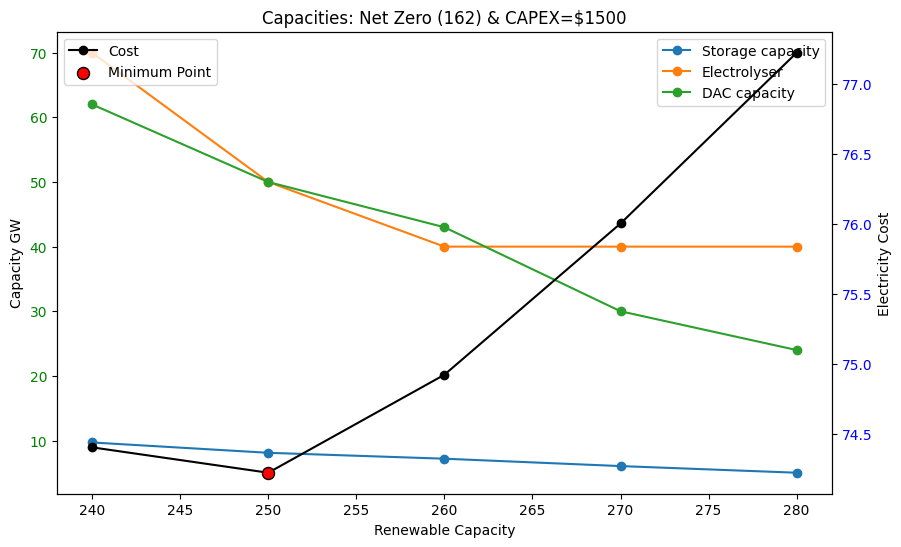

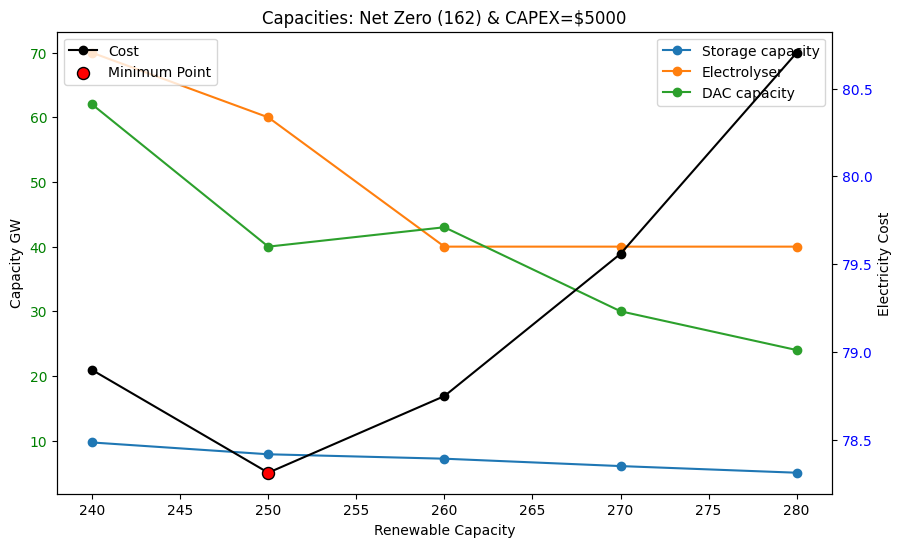

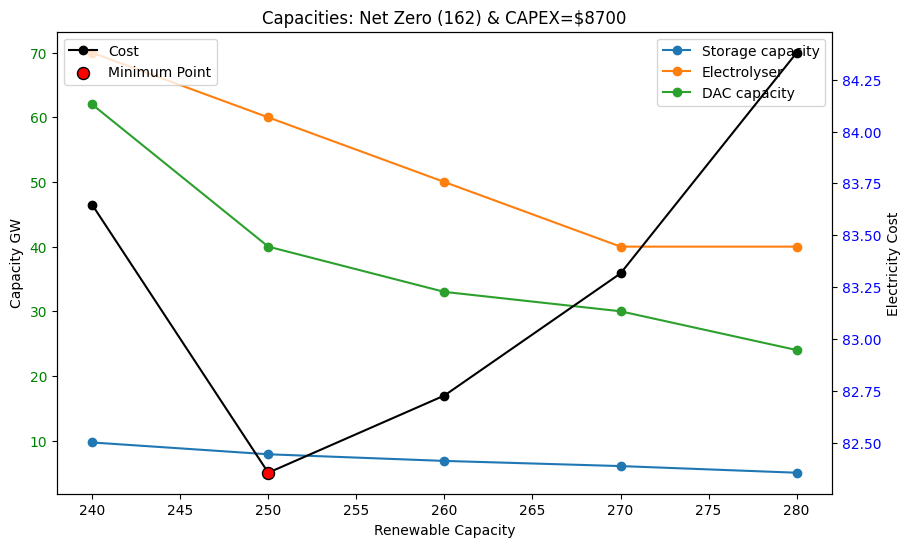

In [13]:
# Net zero 162 & $1500
df = zero_162
min_idx = df.groupby('Unnamed: 2')['1500'].idxmin()
zero_162_red = df.loc[min_idx].reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=((10,6)))
x = np.arange(240,290,10)

#ax1.plot(x,neg_101_red.iloc[:,1]/3, marker='o', label='Renewable capacity, scaled by 1/3') # Renewable
ax1.plot(x,zero_162_red.iloc[:,2]*1000/24/365,marker='o', label='Storage capacity') # Storage
ax1.plot(x,zero_162_red.iloc[:,3],marker='o', label='Electrolyser') #Electrolyser
ax1.plot(x,zero_162_red.iloc[:,12], marker='o', label='DAC capacity') # DAC

ax1.set_xlabel('Renewable Capacity')
ax1.set_ylabel('Capacity GW')
ax1.tick_params(axis='y', labelcolor='g')
ax1.legend()#loc = 'upper left')

ax2 = ax1.twinx()
ax2.plot(x,zero_162_red['1500'], color = 'k', marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = zero_162_red['1500']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Minimum Point', zorder=1)
ax2.set_ylabel('Electricity Cost')
ax2.tick_params(axis='y', labelcolor='b')
ax2.legend()#loc = 'upper left')

plt.title('Capacities: Net Zero (162) & CAPEX=$1500')

# Net zero 162 & $5000
df = zero_162
min_idx = df.groupby('Unnamed: 2')['5000'].idxmin()
zero_162_red = df.loc[min_idx].reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=((10,6)))

#ax1.plot(x,neg_101_red.iloc[:,1]/3, marker='o', label='Renewable capacity, scaled by 1/3') # Renewable
ax1.plot(x,zero_162_red.iloc[:,2]*1000/24/365,marker='o', label='Storage capacity') # Storage
ax1.plot(x,zero_162_red.iloc[:,3],marker='o', label='Electrolyser') #Electrolyser
ax1.plot(x,zero_162_red.iloc[:,12], marker='o', label='DAC capacity') # DAC

ax1.set_xlabel('Renewable Capacity')
ax1.set_ylabel('Capacity GW')
ax1.tick_params(axis='y', labelcolor='g')
ax1.legend()#loc = 'upper left')

ax2 = ax1.twinx()
ax2.plot(x,zero_162_red['5000'], color = 'k', marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = zero_162_red['5000']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Minimum Point', zorder=1)
ax2.set_ylabel('Electricity Cost')
ax2.tick_params(axis='y', labelcolor='b')
ax2.legend()#loc = 'upper left')

plt.title('Capacities: Net Zero (162) & CAPEX=$5000')

# Net zero 162 & $8700
df = zero_162
min_idx = df.groupby('Unnamed: 2')['8700'].idxmin()
zero_162_red = df.loc[min_idx].reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=((10,6)))

#ax1.plot(x,neg_101_red.iloc[:,1]/3, marker='o', label='Renewable capacity, scaled by 1/3') # Renewable
ax1.plot(x,zero_162_red.iloc[:,2]*1000/24/365,marker='o', label='Storage capacity') # Storage
ax1.plot(x,zero_162_red.iloc[:,3],marker='o', label='Electrolyser') #Electrolyser
ax1.plot(x,zero_162_red.iloc[:,12], marker='o', label='DAC capacity') # DAC

ax1.set_xlabel('Renewable Capacity')
ax1.set_ylabel('Capacity GW')
ax1.tick_params(axis='y', labelcolor='g')
ax1.legend()#loc = 'upper left')

ax2 = ax1.twinx()
ax2.plot(x,zero_162_red['8700'], color = 'k', marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = zero_162_red['8700']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Minimum Point', zorder=1)
ax2.set_ylabel('Electricity Cost')
ax2.tick_params(axis='y', labelcolor='b')
ax2.legend()#loc = 'upper left')

plt.title('Capacities: Net Zero (162) & CAPEX=$8700')

##### Net negative 43

Text(0.5, 1.0, 'Capacities: Net Negative (43) & CAPEX=$8700')

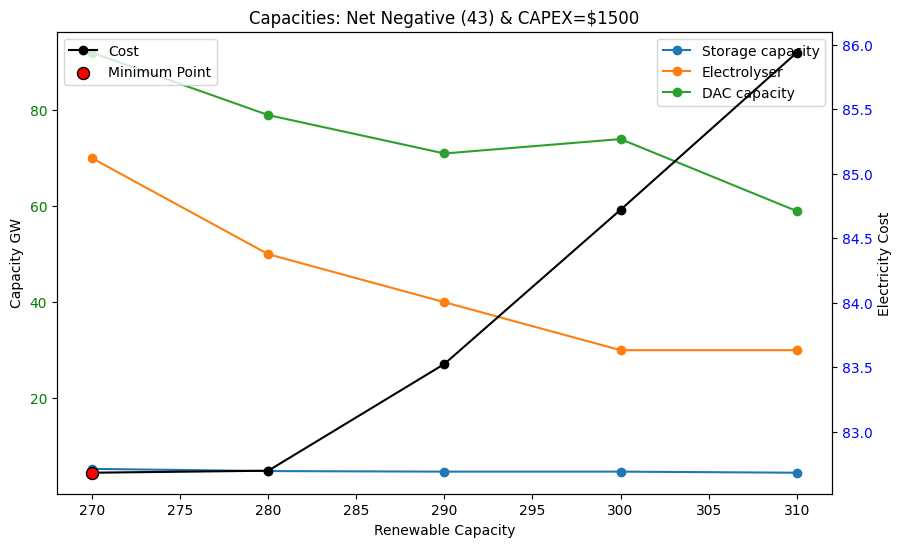

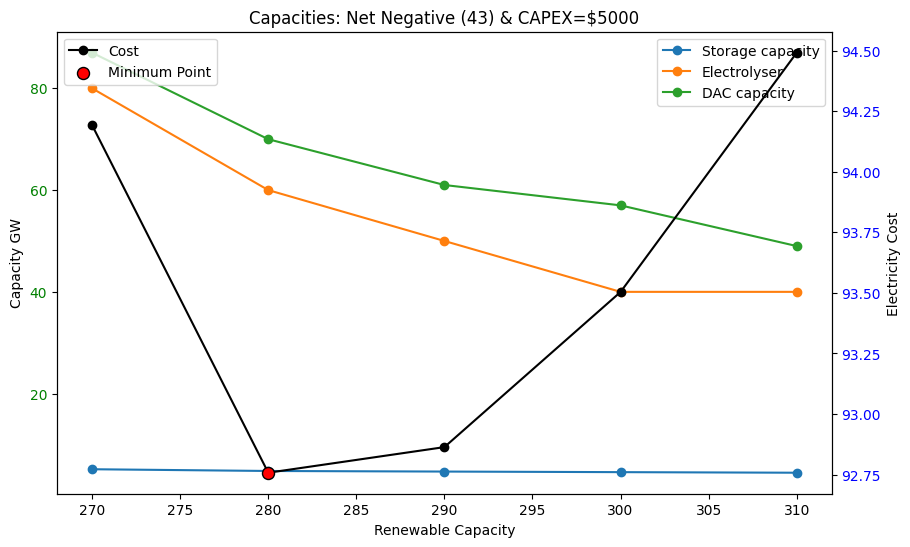

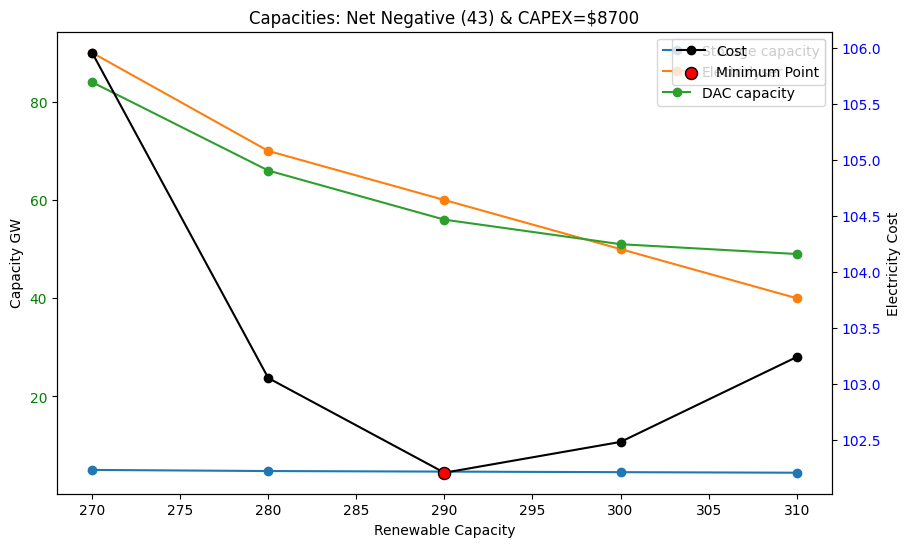

In [14]:
# Net negative 43 & $1500
df = neg_43
min_idx = df.groupby('Unnamed: 2')['1500'].idxmin()
neg_43_red = df.loc[min_idx].reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=((10,6)))
x = np.arange(270,320,10)

#ax1.plot(x,neg_101_red.iloc[:,1]/3, marker='o', label='Renewable capacity, scaled by 1/3') # Renewable
ax1.plot(x,neg_43_red.iloc[:,2]*1000/24/365,marker='o', label='Storage capacity') # Storage
ax1.plot(x,neg_43_red.iloc[:,3],marker='o', label='Electrolyser') #Electrolyser
ax1.plot(x,neg_43_red.iloc[:,12], marker='o', label='DAC capacity') # DAC

ax1.set_xlabel('Renewable Capacity')
ax1.set_ylabel('Capacity GW')
ax1.tick_params(axis='y', labelcolor='g')
ax1.legend()#loc = 'upper left')

ax2 = ax1.twinx()
ax2.plot(x,neg_43_red['1500'], color = 'k', marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = neg_43_red['1500']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Minimum Point', zorder=1)
ax2.set_ylabel('Electricity Cost')
ax2.tick_params(axis='y', labelcolor='b')
ax2.legend()#loc = 'upper left')

plt.title('Capacities: Net Negative (43) & CAPEX=$1500')

# Net negative 43 & $5000
df = neg_43
min_idx = df.groupby('Unnamed: 2')['5000'].idxmin()
neg_43_red = df.loc[min_idx].reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=((10,6)))

#ax1.plot(x,neg_101_red.iloc[:,1]/3, marker='o', label='Renewable capacity, scaled by 1/3') # Renewable
ax1.plot(x,neg_43_red.iloc[:,2]*1000/24/365,marker='o', label='Storage capacity') # Storage
ax1.plot(x,neg_43_red.iloc[:,3],marker='o', label='Electrolyser') #Electrolyser
ax1.plot(x,neg_43_red.iloc[:,12], marker='o', label='DAC capacity') # DAC

ax1.set_xlabel('Renewable Capacity')
ax1.set_ylabel('Capacity GW')
ax1.tick_params(axis='y', labelcolor='g')
ax1.legend()#loc = 'upper left')

ax2 = ax1.twinx()
ax2.plot(x,neg_43_red['5000'], color = 'k', marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = neg_43_red['5000']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Minimum Point', zorder=1)
ax2.set_ylabel('Electricity Cost')
ax2.tick_params(axis='y', labelcolor='b')
ax2.legend()#loc = 'upper left')

plt.title('Capacities: Net Negative (43) & CAPEX=$5000')

# Net negative 43 & $8700
df = neg_43
min_idx = df.groupby('Unnamed: 2')['8700'].idxmin()
neg_43_red = df.loc[min_idx].reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=((10,6)))

#ax1.plot(x,neg_101_red.iloc[:,1]/3, marker='o', label='Renewable capacity, scaled by 1/3') # Renewable
ax1.plot(x,neg_43_red.iloc[:,2]*1000/24/365,marker='o', label='Storage capacity') # Storage
ax1.plot(x,neg_43_red.iloc[:,3],marker='o', label='Electrolyser') #Electrolyser
ax1.plot(x,neg_43_red.iloc[:,12], marker='o', label='DAC capacity') # DAC

ax1.set_xlabel('Renewable Capacity')
ax1.set_ylabel('Capacity GW')
ax1.tick_params(axis='y', labelcolor='g')
ax1.legend()#loc = 'upper left')

ax2 = ax1.twinx()
ax2.plot(x,neg_43_red['8700'], color = 'k', marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = neg_43_red['8700']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Minimum Point', zorder=1)
ax2.set_ylabel('Electricity Cost')
ax2.tick_params(axis='y', labelcolor='b')
ax2.legend()#loc = 'upper left')

plt.title('Capacities: Net Negative (43) & CAPEX=$8700')

##### Net negative 101

In [76]:
df = neg_101
min_idx = df.groupby('Unnamed: 2')['5000'].idxmin()
neg_101_red = df.loc[min_idx].reset_index(drop=True)

In [78]:
neg_101_red.iloc[:,2]

0    37
1    36
2    35
3    34
4    33
5    33
6    32
7    31
8    31
Name: Unnamed: 3, dtype: object

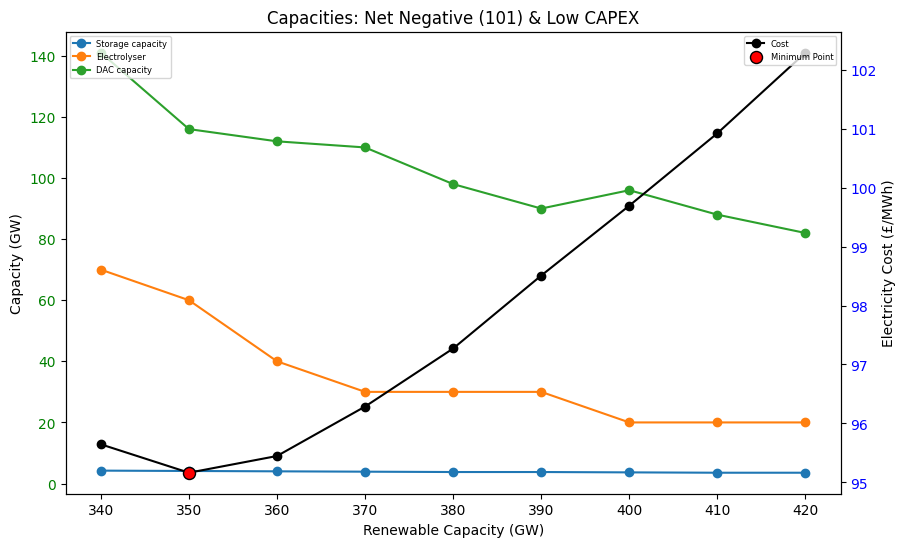

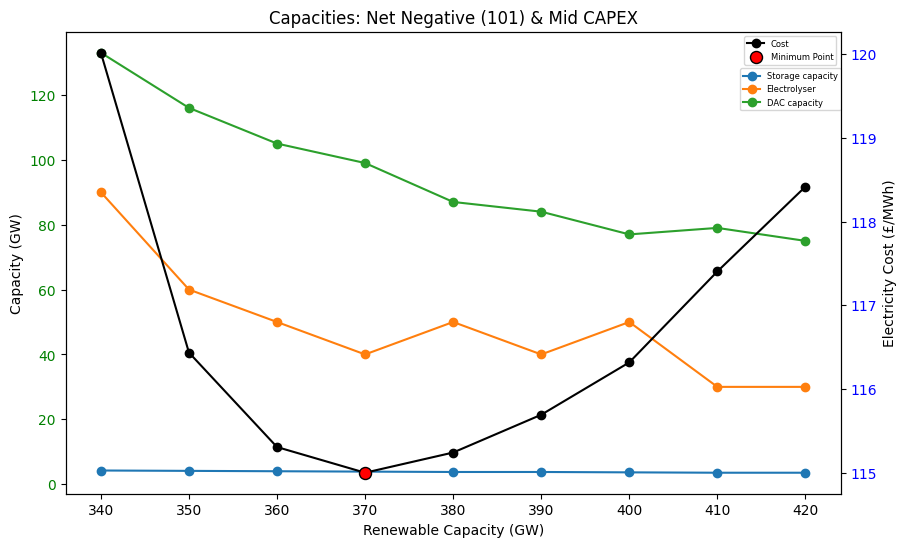

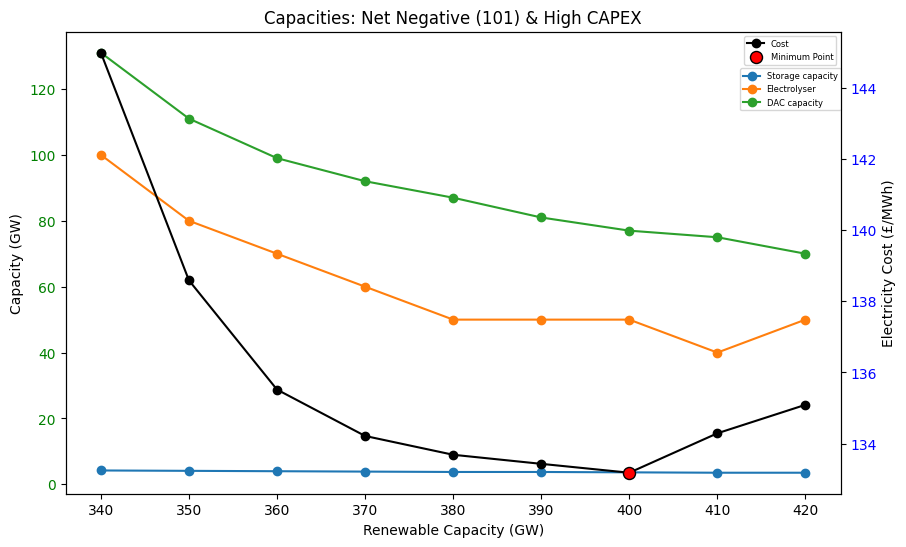

In [82]:
# Net negative 101 & $1500
df = neg_101
min_idx = df.groupby('Unnamed: 2')['1500'].idxmin()
neg_101_red = df.loc[min_idx].reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=((10,6)))
x = np.arange(340,430,10)

#ax1.plot(x,neg_101_red.iloc[:,1]/3, marker='o', label='Renewable capacity, scaled by 1/3') # Renewable
ax1.plot(x,neg_101_red.iloc[:,2]*1000/24/365,marker='o', label='Storage capacity') # Storage
ax1.plot(x,neg_101_red.iloc[:,3],marker='o', label='Electrolyser') #Electrolyser
ax1.plot(x,neg_101_red.iloc[:,12], marker='o', label='DAC capacity') # DAC

ax1.set_xlabel('Renewable Capacity (GW)')
ax1.set_ylabel('Capacity (GW)')
ax1.tick_params(axis='y', labelcolor='g')

ax2 = ax1.twinx()
ax2.plot(x,neg_101_red['1500'], color = 'k', marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = neg_101_red['1500']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Minimum Point', zorder=1)
ax2.set_ylabel('Electricity Cost (£/MWh)')
ax2.tick_params(axis='y', labelcolor='b')
ax1.legend(loc = 'upper left',fontsize=6)
ax2.legend(loc = 'upper right',fontsize=6)

plt.title('Capacities: Net Negative (101) & Low CAPEX')
plt.savefig("Neg1500", bbox_inches='tight')

# Net negative 101 & $5000
df = neg_101
min_idx = df.groupby('Unnamed: 2')['5000'].idxmin()
neg_101_red = df.loc[min_idx].reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=((10,6)))

#ax1.plot(x,neg_101_red.iloc[:,1]/3, marker='o', label='Renewable capacity, scaled by 1/3') # Renewable
ax1.plot(x,neg_101_red.iloc[:,2]*1000/24/365,marker='o', label='Storage capacity') # Storage
ax1.plot(x,neg_101_red.iloc[:,3],marker='o', label='Electrolyser') #Electrolyser
ax1.plot(x,neg_101_red.iloc[:,12], marker='o', label='DAC capacity') # DAC

ax1.set_xlabel('Renewable Capacity (GW)')
ax1.set_ylabel('Capacity (GW)')
ax1.tick_params(axis='y', labelcolor='g')

ax2 = ax1.twinx()
ax2.plot(x,neg_101_red['5000'], color = 'k', marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = neg_101_red['5000']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Minimum Point', zorder=1)
ax2.set_ylabel('Electricity Cost (£/MWh)')
ax2.tick_params(axis='y', labelcolor='b')
ax1.legend(loc = (0.87,0.83),fontsize=6)
ax2.legend(loc = 'upper right',fontsize=6)

plt.title('Capacities: Net Negative (101) & Mid CAPEX')
plt.savefig("Neg5000", bbox_inches='tight')

# Net negative 101 & $8700
df = neg_101
min_idx = df.groupby('Unnamed: 2')['8700'].idxmin()
neg_101_red = df.loc[min_idx].reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=((10,6)))

#ax1.plot(x,neg_101_red.iloc[:,1]/3, marker='o', label='Renewable capacity, scaled by 1/3') # Renewable
ax1.plot(x,neg_101_red.iloc[:,2]*1000/24/365,marker='o', label='Storage capacity') # Storage
ax1.plot(x,neg_101_red.iloc[:,3],marker='o', label='Electrolyser') #Electrolyser
ax1.plot(x,neg_101_red.iloc[:,12], marker='o', label='DAC capacity') # DAC

ax1.set_xlabel('Renewable Capacity (GW)')
ax1.set_ylabel('Capacity (GW)')
ax1.tick_params(axis='y', labelcolor='g')

ax2 = ax1.twinx()
ax2.plot(x,neg_101_red['8700'], color = 'k', marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = neg_101_red['8700']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Minimum Point', zorder=1)
ax2.set_ylabel('Electricity Cost (£/MWh)')
ax2.tick_params(axis='y', labelcolor='b')
ax1.legend(loc = (0.87,0.83),fontsize=6)
ax2.legend(loc = 'upper right',fontsize=6)

plt.title('Capacities: Net Negative (101) & High CAPEX')
plt.savefig("Neg8700", bbox_inches='tight')

##### Net negative 162

Text(0.5, 1.0, 'Capacities: Net Negative (162) & CAPEX=$8700')

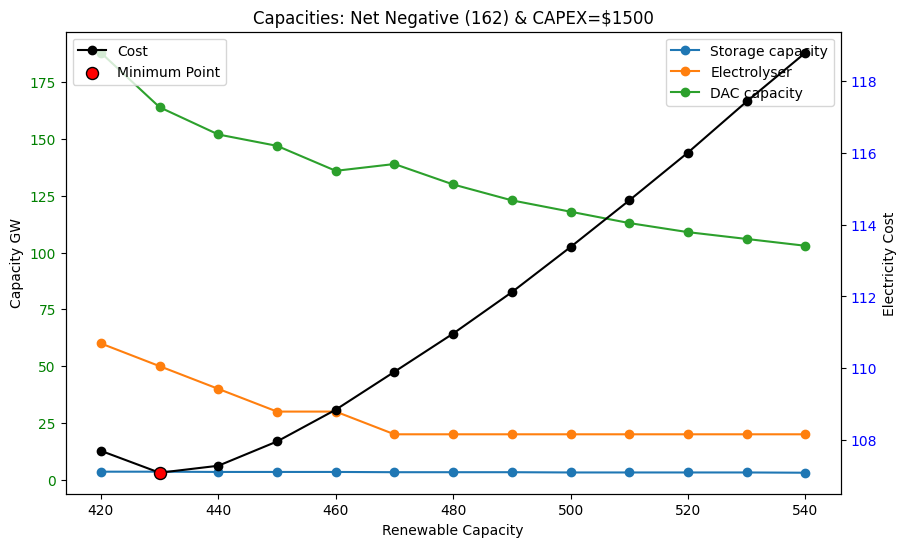

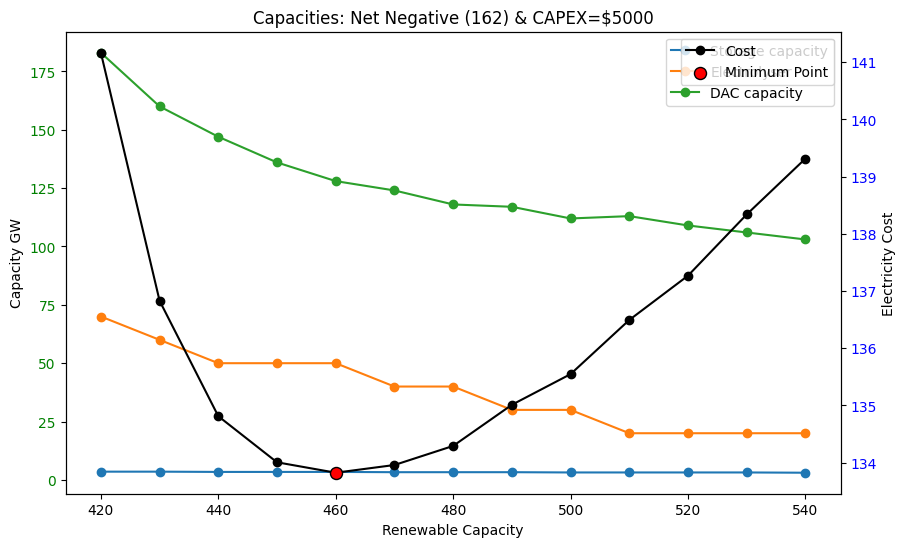

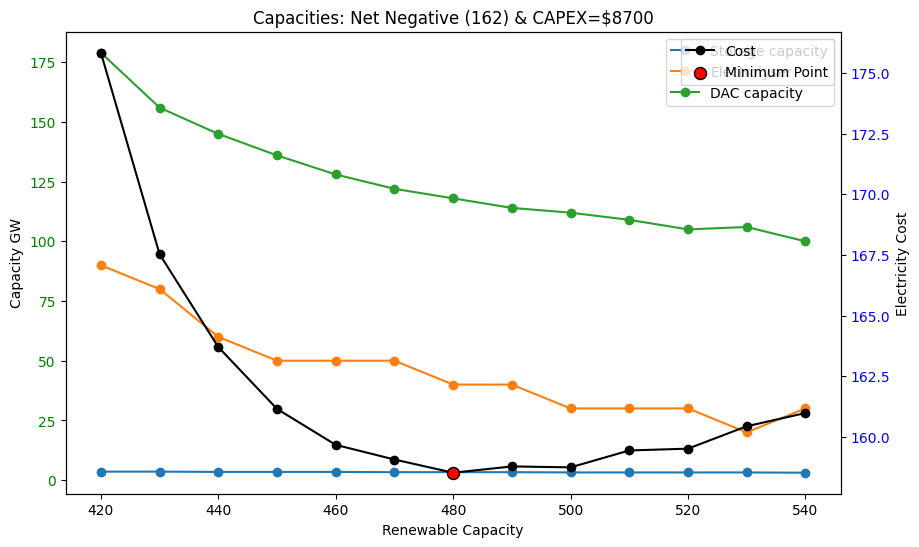

In [16]:
# Net negative 162 & $1500
df = neg_162
min_idx = df.groupby('Unnamed: 2')['1500'].idxmin()
neg_162_red = df.loc[min_idx].reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=((10,6)))
x = np.arange(420,550,10)

#ax1.plot(x,neg_101_red.iloc[:,1]/3, marker='o', label='Renewable capacity, scaled by 1/3') # Renewable
ax1.plot(x,neg_162_red.iloc[:,2]*1000/24/365,marker='o', label='Storage capacity') # Storage
ax1.plot(x,neg_162_red.iloc[:,3],marker='o', label='Electrolyser') #Electrolyser
ax1.plot(x,neg_162_red.iloc[:,12], marker='o', label='DAC capacity') # DAC

ax1.set_xlabel('Renewable Capacity')
ax1.set_ylabel('Capacity GW')
ax1.tick_params(axis='y', labelcolor='g')
ax1.legend()#loc = 'upper left')

ax2 = ax1.twinx()
ax2.plot(x,neg_162_red['1500'], color = 'k', marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = neg_162_red['1500']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Minimum Point', zorder=1)
ax2.set_ylabel('Electricity Cost')
ax2.tick_params(axis='y', labelcolor='b')
ax2.legend()#loc = 'upper left')

plt.title('Capacities: Net Negative (162) & CAPEX=$1500')

# Net negative 162 & $5000
df = neg_162
min_idx = df.groupby('Unnamed: 2')['5000'].idxmin()
neg_162_red = df.loc[min_idx].reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=((10,6)))

#ax1.plot(x,neg_101_red.iloc[:,1]/3, marker='o', label='Renewable capacity, scaled by 1/3') # Renewable
ax1.plot(x,neg_162_red.iloc[:,2]*1000/24/365,marker='o', label='Storage capacity') # Storage
ax1.plot(x,neg_162_red.iloc[:,3],marker='o', label='Electrolyser') #Electrolyser
ax1.plot(x,neg_162_red.iloc[:,12], marker='o', label='DAC capacity') # DAC

ax1.set_xlabel('Renewable Capacity')
ax1.set_ylabel('Capacity GW')
ax1.tick_params(axis='y', labelcolor='g')
ax1.legend()#loc = 'upper left')

ax2 = ax1.twinx()
ax2.plot(x,neg_162_red['5000'], color = 'k', marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = neg_162_red['5000']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Minimum Point', zorder=1)
ax2.set_ylabel('Electricity Cost')
ax2.tick_params(axis='y', labelcolor='b')
ax2.legend()#loc = 'upper left')

plt.title('Capacities: Net Negative (162) & CAPEX=$5000')

# Net negative 162 & $8700
df = neg_162
min_idx = df.groupby('Unnamed: 2')['8700'].idxmin()
neg_162_red = df.loc[min_idx].reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=((10,6)))

#ax1.plot(x,neg_101_red.iloc[:,1]/3, marker='o', label='Renewable capacity, scaled by 1/3') # Renewable
ax1.plot(x,neg_162_red.iloc[:,2]*1000/24/365,marker='o', label='Storage capacity') # Storage
ax1.plot(x,neg_162_red.iloc[:,3],marker='o', label='Electrolyser') #Electrolyser
ax1.plot(x,neg_162_red.iloc[:,12], marker='o', label='DAC capacity') # DAC

ax1.set_xlabel('Renewable Capacity')
ax1.set_ylabel('Capacity GW')
ax1.tick_params(axis='y', labelcolor='g')
ax1.legend()#loc = 'upper left')

ax2 = ax1.twinx()
ax2.plot(x,neg_162_red['8700'], color = 'k', marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = neg_162_red['8700']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Minimum Point', zorder=1)
ax2.set_ylabel('Electricity Cost')
ax2.tick_params(axis='y', labelcolor='b')
ax2.legend()#loc = 'upper left')

plt.title('Capacities: Net Negative (162) & CAPEX=$8700')

##### Net negative 162 (100yr)

Text(0.5, 1.0, 'Capacities: Net Negative (162), 100yr & CAPEX=$8700')

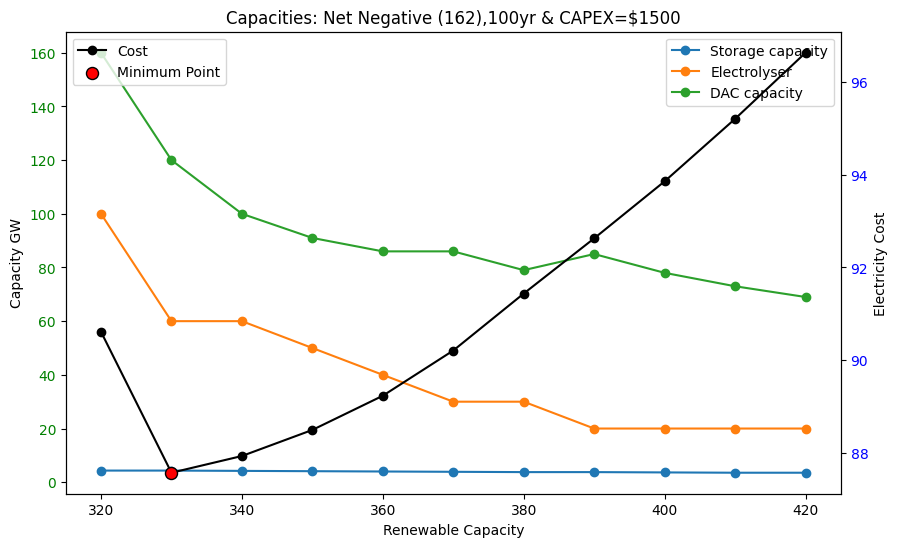

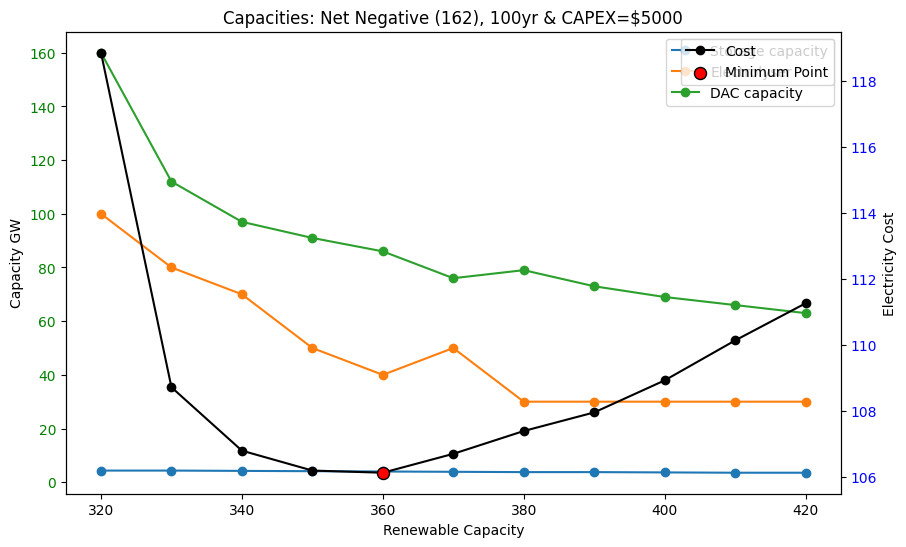

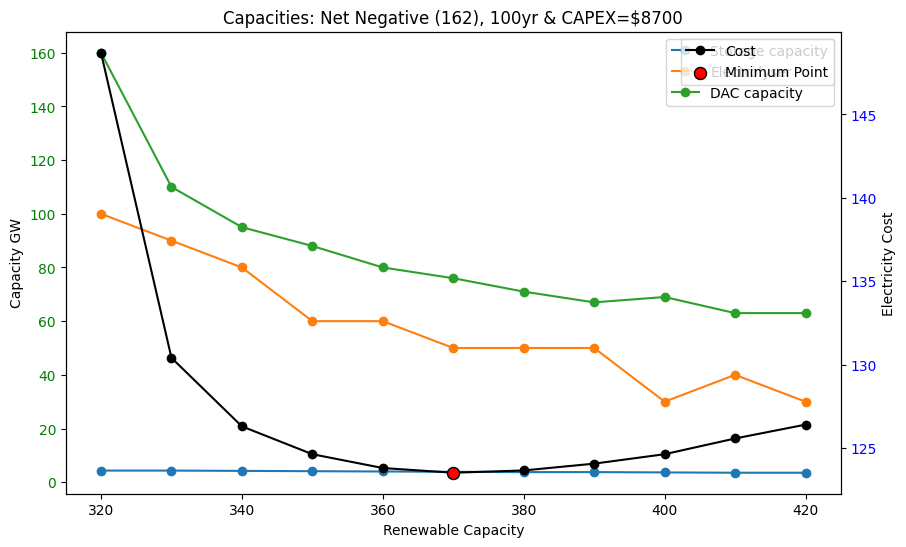

In [17]:
# Net negative 162(100yr) & $1500
df = neg_162_100yr
min_idx = df.groupby('Unnamed: 2')['1500'].idxmin()
neg_162_100yr_red = df.loc[min_idx].reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=((10,6)))
x = np.arange(320,430,10)

#ax1.plot(x,neg_101_red.iloc[:,1]/3, marker='o', label='Renewable capacity, scaled by 1/3') # Renewable
ax1.plot(x,neg_162_100yr_red.iloc[:,2]*1000/24/365,marker='o', label='Storage capacity') # Storage
ax1.plot(x,neg_162_100yr_red.iloc[:,3],marker='o', label='Electrolyser') #Electrolyser
ax1.plot(x,neg_162_100yr_red.iloc[:,12], marker='o', label='DAC capacity') # DAC

ax1.set_xlabel('Renewable Capacity')
ax1.set_ylabel('Capacity GW')
ax1.tick_params(axis='y', labelcolor='g')
ax1.legend()#loc = 'upper left')

ax2 = ax1.twinx()
ax2.plot(x,neg_162_100yr_red['1500'], color = 'k', marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = neg_162_100yr_red['1500']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Minimum Point', zorder=1)
ax2.set_ylabel('Electricity Cost')
ax2.tick_params(axis='y', labelcolor='b')
ax2.legend()#loc = 'upper left')

plt.title('Capacities: Net Negative (162),100yr & CAPEX=$1500')

# Net negative 162(100yr) & $5000
df = neg_162_100yr
min_idx = df.groupby('Unnamed: 2')['5000'].idxmin()
neg_162_100yr_red = df.loc[min_idx].reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=((10,6)))

#ax1.plot(x,neg_101_red.iloc[:,1]/3, marker='o', label='Renewable capacity, scaled by 1/3') # Renewable
ax1.plot(x,neg_162_100yr_red.iloc[:,2]*1000/24/365,marker='o', label='Storage capacity') # Storage
ax1.plot(x,neg_162_100yr_red.iloc[:,3],marker='o', label='Electrolyser') #Electrolyser
ax1.plot(x,neg_162_100yr_red.iloc[:,12], marker='o', label='DAC capacity') # DAC

ax1.set_xlabel('Renewable Capacity')
ax1.set_ylabel('Capacity GW')
ax1.tick_params(axis='y', labelcolor='g')
ax1.legend()#loc = 'upper left')

ax2 = ax1.twinx()
ax2.plot(x,neg_162_100yr_red['5000'], color = 'k', marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = neg_162_100yr_red['5000']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Minimum Point', zorder=1)
ax2.set_ylabel('Electricity Cost')
ax2.tick_params(axis='y', labelcolor='b')
ax2.legend()#loc = 'upper left')

plt.title('Capacities: Net Negative (162), 100yr & CAPEX=$5000')

# Net negative 162 & $8700
df = neg_162_100yr
min_idx = df.groupby('Unnamed: 2')['8700'].idxmin()
neg_162_100yr_red = df.loc[min_idx].reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=((10,6)))

#ax1.plot(x,neg_101_red.iloc[:,1]/3, marker='o', label='Renewable capacity, scaled by 1/3') # Renewable
ax1.plot(x,neg_162_100yr_red.iloc[:,2]*1000/24/365,marker='o', label='Storage capacity') # Storage
ax1.plot(x,neg_162_100yr_red.iloc[:,3],marker='o', label='Electrolyser') #Electrolyser
ax1.plot(x,neg_162_100yr_red.iloc[:,12], marker='o', label='DAC capacity') # DAC

ax1.set_xlabel('Renewable Capacity')
ax1.set_ylabel('Capacity GW')
ax1.tick_params(axis='y', labelcolor='g')
ax1.legend()#loc = 'upper left')

ax2 = ax1.twinx()
ax2.plot(x,neg_162_100yr_red['8700'], color = 'k', marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = neg_162_100yr_red['8700']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Minimum Point', zorder=1)
ax2.set_ylabel('Electricity Cost')
ax2.tick_params(axis='y', labelcolor='b')
ax2.legend()#loc = 'upper left')

plt.title('Capacities: Net Negative (162), 100yr & CAPEX=$8700')

### Transition

##### Net Zero

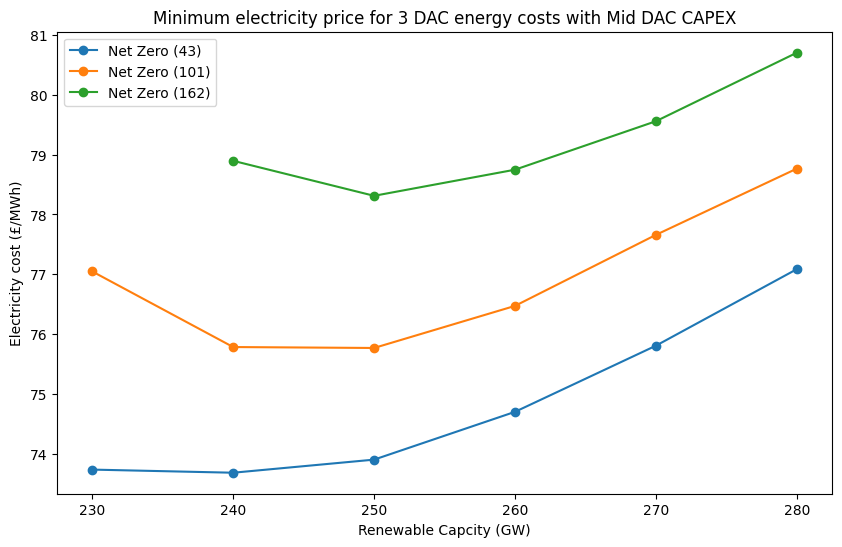

In [69]:
#Net zero 43,101,162
df = zero_43
min_idx = df.groupby('Unnamed: 2')['5000'].idxmin()
zero_43_red = df.loc[min_idx].reset_index(drop=True)
df = zero_101
min_idx = df.groupby('Unnamed: 2')['5000'].idxmin()
zero_101_red = df.loc[min_idx].reset_index(drop=True)
df = zero_162
min_idx = df.groupby('Unnamed: 2')['5000'].idxmin()
zero_162_red = df.loc[min_idx].reset_index(drop=True)

net_zero_transition = pd.concat([zero_43_red, zero_101_red, zero_162_red], ignore_index=True)
net_zero_transition

fig = plt.subplots(figsize=((10,6)))

x = np.arange(230,290,10)
plt.plot(x,zero_43_red['5000'], marker='o', label='Net Zero (43)', zorder=0) # Cost
plt.plot(x,zero_101_red['5000'], marker='o', label='Net Zero (101)', zorder=0) # Cost
x = np.arange(240,290,10)
plt.plot(x,zero_162_red['5000'], marker='o', label='Net Zero (162)', zorder=0) # Cost

plt.xlabel('Renewable Capcity (GW)')
plt.ylabel('Electricity cost (£/MWh)')
plt.legend()
plt.title('Minimum electricity price for 3 DAC energy costs with Mid DAC CAPEX')
plt.savefig("Z3", bbox_inches='tight')

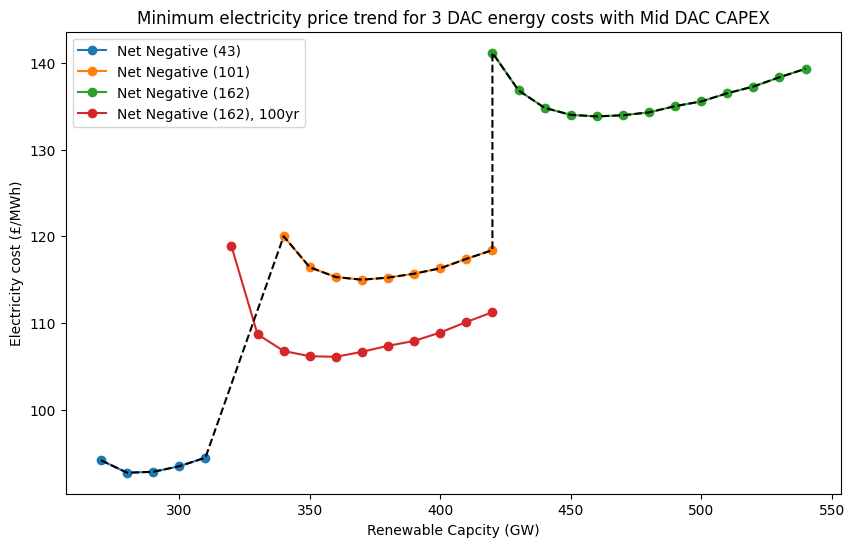

In [70]:
#Net negative 43,101,162, 162(100yr)
df = neg_43
min_idx = df.groupby('Unnamed: 2')['5000'].idxmin()
neg_43_red = df.loc[min_idx].reset_index(drop=True)
df = neg_101
min_idx = df.groupby('Unnamed: 2')['5000'].idxmin()
neg_101_red = df.loc[min_idx].reset_index(drop=True)
df = neg_162
min_idx = df.groupby('Unnamed: 2')['5000'].idxmin()
neg_162_red = df.loc[min_idx].reset_index(drop=True)
df = neg_162_100yr
min_idx = df.groupby('Unnamed: 2')['5000'].idxmin()
neg_162_100yr_red = df.loc[min_idx].reset_index(drop=True)

net_neg_transition = pd.concat([neg_43_red, neg_101_red, neg_162_red, neg_162_100yr_red], ignore_index=True)
net_neg_transition

fig, ax1 = plt.subplots(figsize=((10,6)))

x1 = np.arange(270,320,10)
plt.plot(x1,neg_43_red['5000'], marker='o', label='Net Negative (43)', zorder=0) # Cost
x2 = np.arange(340,430,10)
plt.plot(x2,neg_101_red['5000'], marker='o', label='Net Negative (101)', zorder=0) # Cost
x3 = np.arange(420,550,10)
plt.plot(x3,neg_162_red['5000'], marker='o', label='Net Negative (162)', zorder=0) # Cost
x = np.arange(320,430,10)
plt.plot(x,neg_162_100yr_red['5000'], marker='o', label='Net Negative (162), 100yr', zorder=0) # Cost

x_all = np.concatenate([x1, x2, x3])
y_all = np.concatenate([neg_43_red['5000'], neg_101_red['5000'], neg_162_red['5000']])
plt.plot(x_all, y_all, 'k--')

#x_all = np.concatenate([x,x3])
#y_all = np.concatenate([neg_162_100yr_red['5000'], neg_162_red['5000']])
#plt.plot(x_all, y_all, 'b--')

plt.xlabel('Renewable Capcity (GW)')
plt.ylabel('Electricity cost (£/MWh)')
plt.legend()
plt.title('Minimum electricity price trend for 3 DAC energy costs with Mid DAC CAPEX')
plt.savefig("N3", bbox_inches='tight')

In [63]:
#Summary table
net_zero_transition_summary = net_zero_transition.iloc[:,[1,2,3,11,12,49]]
net_zero_transition_summary = net_zero_transition_summary.rename(columns={'Unnamed: 2': 'Renewable', 'Unnamed: 3': 'Storage', 'Unnamed: 4': 'Electrolyser', 'Unnamed: 12': 'DAC Capacity Factor', 'Unnamed: 13': 'DAC'})
net_neg_transition_summary = net_neg_transition.iloc[:,[1,2,3,11,12,49]]
net_neg_transition_summary = net_neg_transition_summary.rename(columns={'Unnamed: 2': 'Renewable', 'Unnamed: 3': 'Storage', 'Unnamed: 4': 'Electrolyser', 'Unnamed: 12': 'DAC Capacity Factor', 'Unnamed: 13': 'DAC'})

In [64]:
net_zero_transition_summary

,Renewable,Storage,Electrolyser,DAC Capacity Factor,DAC,5000
0,230,121,60,7.08,31,73.735516
1,240,99,50,11.44,18,73.683314
2,250,71,50,19.02,11,73.902077
3,260,63,40,20.66,10,74.701026
4,270,53,40,27.51,7,75.806586
5,280,52,30,25.46,8,77.085712
6,230,113,80,10.09,66,77.047796
7,240,91,60,14.98,36,75.784029
8,250,71,50,19.02,27,75.768543
9,260,63,40,20.66,24,76.471911


In [65]:
net_neg_transition_summary

,Renewable,Storage,Electrolyser,DAC Capacity Factor,DAC,5000
0,270,45,80,37.2,87,94.192025
1,280,42,60,40.44,70,92.757950
2,290,41,50,42.92,61,92.863614
3,300,40,40,44.09,57,93.503754
4,310,39,40,48.62,49,94.491148
5,340,37,90,65.89,133,120.012998
6,350,36,60,67.19,116,116.437243
7,360,35,50,68.74,105,115.310606
8,370,34,40,69.21,99,115.004422
9,380,33,50,73.46,87,115.245258


### Variations OPEX(1-3%)

##### DAC=101 OPEX:1%

In [23]:
#Net zero 101
zero_101_opex1 = pd.read_excel(io='C:/Users/Rei/Desktop/Renewable/LCOE_netelec.xlsx',
                                   sheet_name='Zero 101')
zero_101_opex1 = zero_101_opex1.iloc[start_ind:, start_col:]

#Net negative 101
neg_101_opex1 = pd.read_excel(io='C:/Users/Rei/Desktop/Renewable/LCOE_netelec.xlsx',
                                   sheet_name='Neg_101')
neg_101_opex1 = neg_101_opex1.iloc[start_ind:, start_col:]

zero_101_opex1 = zero_101_opex1.drop(columns=["Unnamed: 14","Unnamed: 16","Unnamed: 17","Unnamed: 18"], axis=1)
neg_101_opex1 = neg_101_opex1.drop(columns=["Unnamed: 14","Unnamed: 16","Unnamed: 17","Unnamed: 18"], axis=1)


#OPEX = 1%
opex = 0.01
Annual_cost = CAPEX_arr * currency * 10**6 * (discount_rate/(1-(1/(1+discount_rate))**life)+opex)

# net zero 101
zero101costopex1 = []
# Find the total electricity costs and reshape the array for each DAC CAPEX
for j in range(0,len(CAPEX_arr)):
    for i in range(0,42):
        cost = zero_101_opex1.iloc[i,5:11].sum() + zero_101_opex1.iloc[i,13] + zero_101_opex1.iloc[i,11]/100*zero_101_opex1.iloc[i,12]*Annual_cost[j]/(zero101demand*0.001)/10**9
        zero101costopex1.append(cost)
zero101costopex1 = np.array(zero101costopex1).astype(float)
zero101costopex1 = zero101costopex1.reshape(len(CAPEX_arr),42)

for j in range(0,len(CAPEX_arr)):
    temp_df = pd.DataFrame({f'{CAPEX_arr[j]}': zero101costopex1[j]})
    temp_df.index = pd.Index(range(3,45))
    zero_101_opex1 = pd.concat([zero_101_opex1, temp_df], axis=1)


# net negative 101
neg101costopex1 = []
# Find the total electricity costs and reshape the array for each DAC CAPEX
for j in range(0,len(CAPEX_arr)):
    for i in range(0,71):
        cost = neg_101_opex1.iloc[i,5:11].sum() + neg_101_opex1.iloc[i,13] + neg_101_opex1.iloc[i,11]/100*neg_101_opex1.iloc[i,12]*Annual_cost[j]/(neg101demand*0.001)/10**9
        neg101costopex1.append(cost)
neg101costopex1 = np.array(neg101costopex1).astype(float)
neg101costopex1 = neg101costopex1.reshape(len(CAPEX_arr),71)

for j in range(0,len(CAPEX_arr)):
    temp_df = pd.DataFrame({f'{CAPEX_arr[j]}': neg101costopex1[j]})
    temp_df.index = pd.Index(range(3,74))
    neg_101_opex1 = pd.concat([neg_101_opex1, temp_df], axis=1)

##### DAC=101 OPEX:3%

In [24]:
#Net zero 101
zero_101_opex3 = pd.read_excel(io='C:/Users/Rei/Desktop/Renewable/LCOE_netelec.xlsx',
                                   sheet_name='Zero 101')
zero_101_opex3 = zero_101_opex3.iloc[start_ind:, start_col:]

#Net negative 101
neg_101_opex3 = pd.read_excel(io='C:/Users/Rei/Desktop/Renewable/LCOE_netelec.xlsx',
                                   sheet_name='Neg_101')
neg_101_opex3 = neg_101_opex3.iloc[start_ind:, start_col:]

zero_101_opex3 = zero_101_opex3.drop(columns=["Unnamed: 14","Unnamed: 16","Unnamed: 17","Unnamed: 18"], axis=1)
neg_101_opex3 = neg_101_opex3.drop(columns=["Unnamed: 14","Unnamed: 16","Unnamed: 17","Unnamed: 18"], axis=1)


#OPEX = 3%
opex = 0.03
Annual_cost = CAPEX_arr * currency * 10**6 * (discount_rate/(1-(1/(1+discount_rate))**life)+opex)

# net zero 101
zero101costopex3 = []
# Find the total electricity costs and reshape the array for each DAC CAPEX
for j in range(0,len(CAPEX_arr)):
    for i in range(0,42):
        cost = zero_101_opex3.iloc[i,5:11].sum() + zero_101_opex3.iloc[i,13] + zero_101_opex3.iloc[i,11]/100*zero_101_opex3.iloc[i,12]*Annual_cost[j]/(zero101demand*0.001)/10**9
        zero101costopex3.append(cost)
zero101costopex3 = np.array(zero101costopex3).astype(float)
zero101costopex3 = zero101costopex3.reshape(len(CAPEX_arr),42)

for j in range(0,len(CAPEX_arr)):
    temp_df = pd.DataFrame({f'{CAPEX_arr[j]}': zero101costopex3[j]})
    temp_df.index = pd.Index(range(3,45))
    zero_101_opex3 = pd.concat([zero_101_opex3, temp_df], axis=1)


# net negative 101
neg101costopex3 = []
# Find the total electricity costs and reshape the array for each DAC CAPEX
for j in range(0,len(CAPEX_arr)):
    for i in range(0,71):
        cost = neg_101_opex3.iloc[i,5:11].sum() + neg_101_opex3.iloc[i,13] + neg_101_opex3.iloc[i,11]/100*neg_101_opex3.iloc[i,12]*Annual_cost[j]/(neg101demand*0.001)/10**9
        neg101costopex3.append(cost)
neg101costopex3 = np.array(neg101costopex3).astype(float)
neg101costopex3 = neg101costopex3.reshape(len(CAPEX_arr),71)

for j in range(0,len(CAPEX_arr)):
    temp_df = pd.DataFrame({f'{CAPEX_arr[j]}': neg101costopex3[j]})
    temp_df.index = pd.Index(range(3,74))
    neg_101_opex3 = pd.concat([neg_101_opex3, temp_df], axis=1)

##### Comparison between Net zero: OPEX(1,2,3 %)

Text(0.5, 1.0, 'Minimum electricity price for net zero:different DAC OPEX')

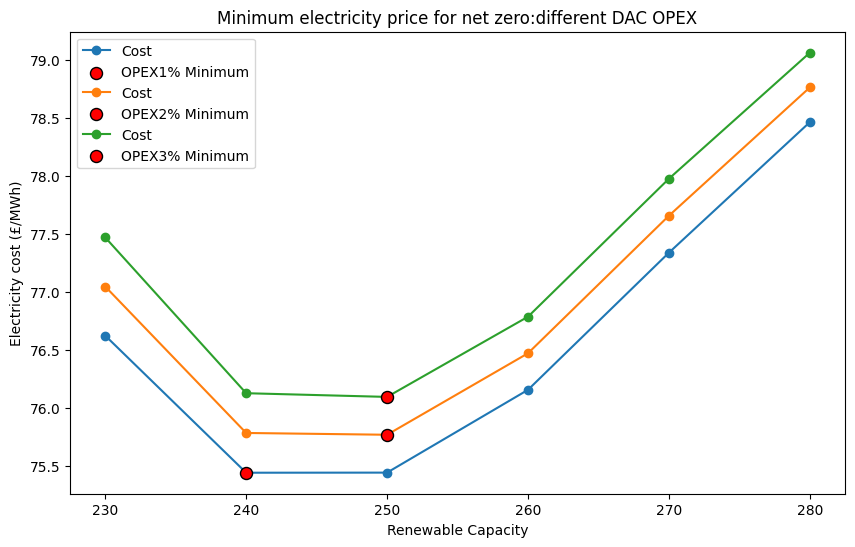

In [25]:
# Net zero 101 & OPEX1%
df = zero_101_opex1
min_idx = df.groupby('Unnamed: 2')['5000'].idxmin()
zero_101_red_opex1 = df.loc[min_idx].reset_index(drop=True)
# Net zero 101 & OPEX3%
df = zero_101_opex3
min_idx = df.groupby('Unnamed: 2')['5000'].idxmin()
zero_101_red_opex3 = df.loc[min_idx].reset_index(drop=True)



fig, ax1 = plt.subplots(figsize=((10,6)))
x = np.arange(230,290,10)

ax1.plot(x,zero_101_red_opex1['5000'], marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = zero_101_red_opex1['5000']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='OPEX1% Minimum', zorder=1)

#OPEX 2%
ax1.plot(x,zero_101_red['5000'], marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = zero_101_red['5000']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='OPEX2% Minimum', zorder=1)

# Net zero 101 & OPEX3%
ax1.plot(x,zero_101_red_opex3['5000'], marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = zero_101_red_opex3['5000']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='OPEX3% Minimum', zorder=1)
ax1.set_xlabel('Renewable Capacity')
ax1.set_ylabel('Electricity cost (£/MWh)')
ax1.legend()#loc = 'upper left')
ax1.set_title('Minimum electricity price for net zero:different DAC OPEX')

##### Comparison between Net negative: OPEX(1,2,3 %)

Text(0.5, 1.0, 'Minimum electricity price for net zero: different DAC OPEX')

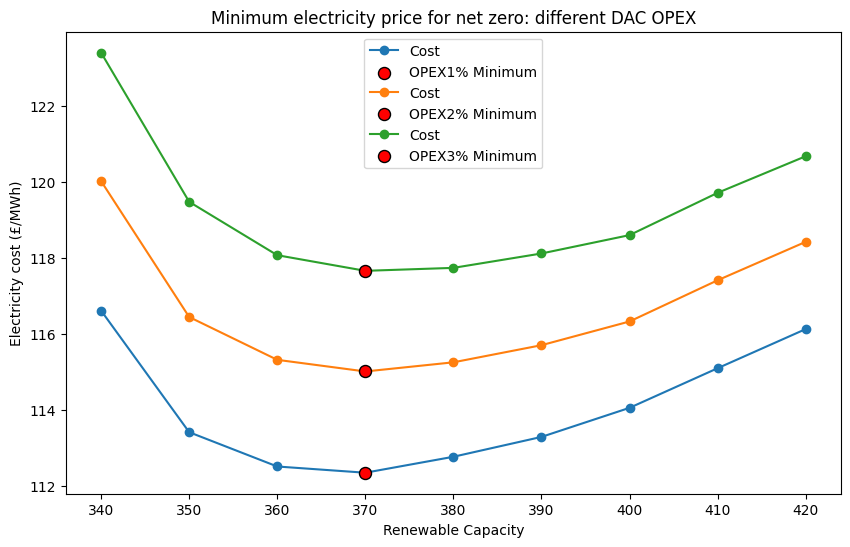

In [26]:
# Net negative 101 & OPEX1%
df = neg_101_opex1
min_idx = df.groupby('Unnamed: 2')['5000'].idxmin()
neg_101_red_opex1 = df.loc[min_idx].reset_index(drop=True)
# Net zero 101 & OPEX3%
df = neg_101_opex3
min_idx = df.groupby('Unnamed: 2')['5000'].idxmin()
neg_101_red_opex3 = df.loc[min_idx].reset_index(drop=True)



fig, ax1 = plt.subplots(figsize=((10,6)))
x = np.arange(340,430,10)

ax1.plot(x,neg_101_red_opex1['5000'], marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = neg_101_red_opex1['5000']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='OPEX1% Minimum', zorder=1)

#OPEX 2%
ax1.plot(x,neg_101_red['5000'], marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = neg_101_red['5000']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='OPEX2% Minimum', zorder=1)

#OPEX3%
ax1.plot(x,neg_101_red_opex3['5000'], marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = neg_101_red_opex3['5000']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='OPEX3% Minimum', zorder=1)
ax1.set_xlabel('Renewable Capacity')
ax1.set_ylabel('Electricity cost (£/MWh)')
ax1.legend()#loc = 'upper left')
ax1.set_title('Minimum electricity price for net zero: different DAC OPEX')

### Variations Lifetime(15-25 years)

##### DAC = 101 (Lifetime:15yr)

In [27]:
#Net zero 101
zero_101_life15 = pd.read_excel(io='C:/Users/Rei/Desktop/Renewable/LCOE_netelec.xlsx',
                                   sheet_name='Zero 101')
zero_101_life15 = zero_101_life15.iloc[start_ind:, start_col:]

#Net negative 101
neg_101_life15 = pd.read_excel(io='C:/Users/Rei/Desktop/Renewable/LCOE_netelec.xlsx',
                                   sheet_name='Neg_101')
neg_101_life15 = neg_101_life15.iloc[start_ind:, start_col:]

zero_101_life15 = zero_101_life15.drop(columns=["Unnamed: 14","Unnamed: 16","Unnamed: 17","Unnamed: 18"], axis=1)
neg_101_life15 = neg_101_life15.drop(columns=["Unnamed: 14","Unnamed: 16","Unnamed: 17","Unnamed: 18"], axis=1)


#Lifetime = 15 years
life = 15
opex = 0.02
Annual_cost = CAPEX_arr * currency * 10**6 * (discount_rate/(1-(1/(1+discount_rate))**life)+opex)

# net zero 101
zero101costlife15 = []
# Find the total electricity costs and reshape the array for each DAC CAPEX
for j in range(0,len(CAPEX_arr)):
    for i in range(0,42):
        cost = zero_101_life15.iloc[i,5:11].sum() + zero_101_life15.iloc[i,13] + zero_101_life15.iloc[i,11]/100*zero_101_life15.iloc[i,12]*Annual_cost[j]/(zero101demand*0.001)/10**9
        zero101costlife15.append(cost)
zero101costlife15 = np.array(zero101costlife15).astype(float)
zero101costlife15 = zero101costlife15.reshape(len(CAPEX_arr),42)

for j in range(0,len(CAPEX_arr)):
    temp_df = pd.DataFrame({f'{CAPEX_arr[j]}': zero101costlife15[j]})
    temp_df.index = pd.Index(range(3,45))
    zero_101_life15 = pd.concat([zero_101_life15, temp_df], axis=1)


# net negative 101
neg101costlife15 = []
# Find the total electricity costs and reshape the array for each DAC CAPEX
for j in range(0,len(CAPEX_arr)):
    for i in range(0,71):
        cost = neg_101_life15.iloc[i,5:11].sum() + neg_101_life15.iloc[i,13] + neg_101_life15.iloc[i,11]/100*neg_101_life15.iloc[i,12]*Annual_cost[j]/(neg101demand*0.001)/10**9
        neg101costlife15.append(cost)
neg101costlife15 = np.array(neg101costlife15).astype(float)
neg101costlife15 = neg101costlife15.reshape(len(CAPEX_arr),71)

for j in range(0,len(CAPEX_arr)):
    temp_df = pd.DataFrame({f'{CAPEX_arr[j]}': neg101costlife15[j]})
    temp_df.index = pd.Index(range(3,74))
    neg_101_life15 = pd.concat([neg_101_life15, temp_df], axis=1)

##### DAc = 101 (Lifetime:25yr)

In [28]:
#Net zero 101
zero_101_life25 = pd.read_excel(io='C:/Users/Rei/Desktop/Renewable/LCOE_netelec.xlsx',
                                   sheet_name='Zero 101')
zero_101_life25 = zero_101_life25.iloc[start_ind:, start_col:]

#Net negative 101
neg_101_life25 = pd.read_excel(io='C:/Users/Rei/Desktop/Renewable/LCOE_netelec.xlsx',
                                   sheet_name='Neg_101')
neg_101_life25 = neg_101_life25.iloc[start_ind:, start_col:]

zero_101_life25 = zero_101_life25.drop(columns=["Unnamed: 14","Unnamed: 16","Unnamed: 17","Unnamed: 18"], axis=1)
neg_101_life25 = neg_101_life25.drop(columns=["Unnamed: 14","Unnamed: 16","Unnamed: 17","Unnamed: 18"], axis=1)


#Lifetime = 15 years
life = 25
Annual_cost = CAPEX_arr * currency * 10**6 * (discount_rate/(1-(1/(1+discount_rate))**life)+opex)

# net zero 101
zero101costlife25 = []
# Find the total electricity costs and reshape the array for each DAC CAPEX
for j in range(0,len(CAPEX_arr)):
    for i in range(0,42):
        cost = zero_101_life25.iloc[i,5:11].sum() + zero_101_life25.iloc[i,13] + zero_101_life25.iloc[i,11]/100*zero_101_life25.iloc[i,12]*Annual_cost[j]/(zero101demand*0.001)/10**9
        zero101costlife25.append(cost)
zero101costlife25 = np.array(zero101costlife25).astype(float)
zero101costlife25 = zero101costlife25.reshape(len(CAPEX_arr),42)

for j in range(0,len(CAPEX_arr)):
    temp_df = pd.DataFrame({f'{CAPEX_arr[j]}': zero101costlife25[j]})
    temp_df.index = pd.Index(range(3,45))
    zero_101_life25 = pd.concat([zero_101_life25, temp_df], axis=1)


# net negative 101
neg101costlife25 = []
# Find the total electricity costs and reshape the array for each DAC CAPEX
for j in range(0,len(CAPEX_arr)):
    for i in range(0,71):
        cost = neg_101_life25.iloc[i,5:11].sum() + neg_101_life25.iloc[i,13] + neg_101_life25.iloc[i,11]/100*neg_101_life25.iloc[i,12]*Annual_cost[j]/(neg101demand*0.001)/10**9
        neg101costlife25.append(cost)
neg101costlife25 = np.array(neg101costlife25).astype(float)
neg101costlife25 = neg101costlife25.reshape(len(CAPEX_arr),71)

for j in range(0,len(CAPEX_arr)):
    temp_df = pd.DataFrame({f'{CAPEX_arr[j]}': neg101costlife25[j]})
    temp_df.index = pd.Index(range(3,74))
    neg_101_life25 = pd.concat([neg_101_life25, temp_df], axis=1)

##### Comparison between Net zero: Lifetime(15,20,25 yr)

Text(0.5, 1.0, 'Minimum electricity price for net zero: different DAC Lifetime')

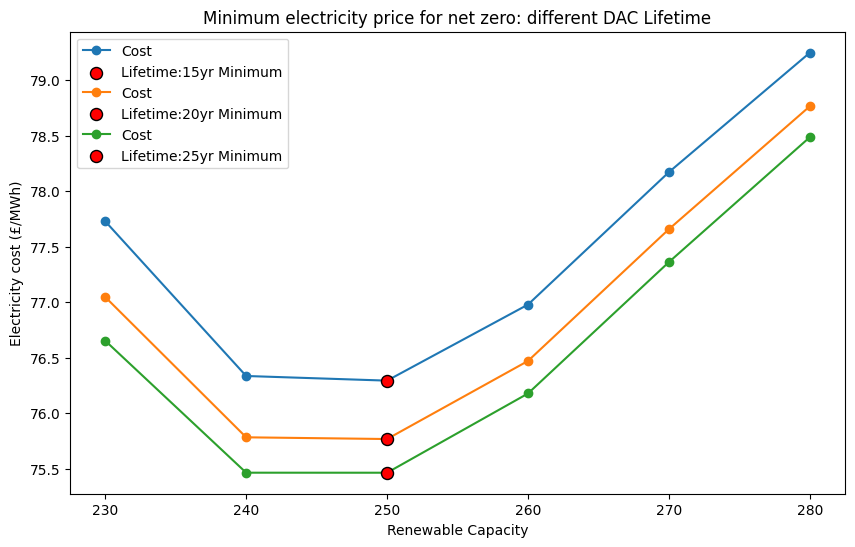

In [29]:
# Net zero 101 & lifetime 15yr
df = zero_101_life15
min_idx = df.groupby('Unnamed: 2')['5000'].idxmin()
zero_101_red_life15 = df.loc[min_idx].reset_index(drop=True)
# Net zero 101 & lifetime 25yr
df = zero_101_life25
min_idx = df.groupby('Unnamed: 2')['5000'].idxmin()
zero_101_red_life25 = df.loc[min_idx].reset_index(drop=True)



fig, ax1 = plt.subplots(figsize=((10,6)))
x = np.arange(230,290,10)

ax1.plot(x,zero_101_red_life15['5000'], marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = zero_101_red_life15['5000']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Lifetime:15yr Minimum', zorder=1)

#Lifetime 20yr
ax1.plot(x,zero_101_red['5000'], marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = zero_101_red['5000']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Lifetime:20yr Minimum', zorder=1)

# Lifetime 25yr
ax1.plot(x,zero_101_red_life25['5000'], marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = zero_101_red_life25['5000']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Lifetime:25yr Minimum', zorder=1)
ax1.set_xlabel('Renewable Capacity')
ax1.set_ylabel('Electricity cost (£/MWh)')
ax1.legend()#loc = 'upper left')
ax1.set_title('Minimum electricity price for net zero: different DAC Lifetime')

##### Comparison between Net negative: Lifetime(15,20,25 yr)

Text(0.5, 1.0, 'Minimum electricity price for net negative: different DAC Lifetime')

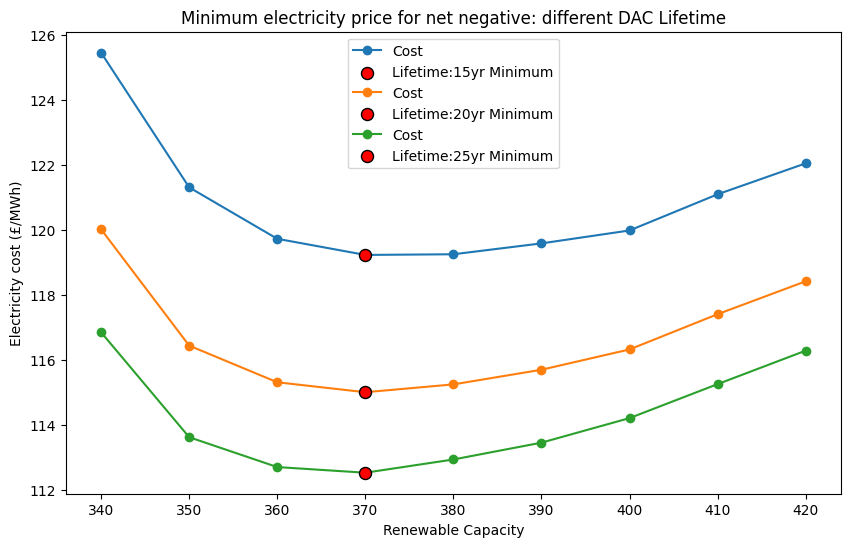

In [30]:
# Net zero 101 & lifetime 15yr
df = neg_101_life15
min_idx = df.groupby('Unnamed: 2')['5000'].idxmin()
neg_101_red_life15 = df.loc[min_idx].reset_index(drop=True)
# Net zero 101 & lifetime 25yr
df = neg_101_life25
min_idx = df.groupby('Unnamed: 2')['5000'].idxmin()
neg_101_red_life25 = df.loc[min_idx].reset_index(drop=True)



fig, ax1 = plt.subplots(figsize=((10,6)))
x = np.arange(340,430,10)

ax1.plot(x,neg_101_red_life15['5000'], marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = neg_101_red_life15['5000']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Lifetime:15yr Minimum', zorder=1)

#Lifetime 20yr
ax1.plot(x,neg_101_red['5000'], marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = neg_101_red['5000']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Lifetime:20yr Minimum', zorder=1)

# Lifetime 25yr
ax1.plot(x,neg_101_red_life25['5000'], marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = neg_101_red_life25['5000']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Lifetime:25yr Minimum', zorder=1)
ax1.set_xlabel('Renewable Capacity')
ax1.set_ylabel('Electricity cost (£/MWh)')
ax1.legend()#loc = 'upper left')
ax1.set_title('Minimum electricity price for net negative: different DAC Lifetime')

In [31]:
### Variations Discount Rate(5, 7.5, 10 %)

In [32]:
##### DAC=101, Discount rate=7.5%

In [33]:
#Net zero 101
zero_101_dis7 = pd.read_excel(io='C:/Users/Rei/Desktop/Renewable/LCOE_netelec.xlsx',
                                   sheet_name='Zero 101')
zero_101_dis7 = zero_101_dis7.iloc[start_ind:, start_col:]

#Net negative 101
neg_101_dis7 = pd.read_excel(io='C:/Users/Rei/Desktop/Renewable/LCOE_netelec.xlsx',
                                   sheet_name='Neg_101')
neg_101_dis7 = neg_101_dis7.iloc[start_ind:, start_col:]

zero_101_dis7 = zero_101_dis7.drop(columns=["Unnamed: 14","Unnamed: 16","Unnamed: 17","Unnamed: 18"], axis=1)
neg_101_dis7 = neg_101_dis7.drop(columns=["Unnamed: 14","Unnamed: 16","Unnamed: 17","Unnamed: 18"], axis=1)


#Discount rate = 7.5%
life = 20
opex = 0.02
discount_rate = 0.075
Annual_cost = CAPEX_arr * currency * 10**6 * (discount_rate/(1-(1/(1+discount_rate))**life)+opex)

# net zero 101
zero101costdis7 = []
# Find the total electricity costs and reshape the array for each DAC CAPEX
for j in range(0,len(CAPEX_arr)):
    for i in range(0,42):
        cost = zero_101_dis7.iloc[i,5:11].sum() + zero_101_dis7.iloc[i,13] + zero_101_dis7.iloc[i,11]/100*zero_101_dis7.iloc[i,12]*Annual_cost[j]/(zero101demand*0.001)/10**9
        zero101costdis7.append(cost)
zero101costdis7 = np.array(zero101costdis7).astype(float)
zero101costdis7 = zero101costdis7.reshape(len(CAPEX_arr),42)

for j in range(0,len(CAPEX_arr)):
    temp_df = pd.DataFrame({f'{CAPEX_arr[j]}': zero101costdis7[j]})
    temp_df.index = pd.Index(range(3,45))
    zero_101_dis7 = pd.concat([zero_101_dis7, temp_df], axis=1)


# net negative 101
neg101costdis7 = []
# Find the total electricity costs and reshape the array for each DAC CAPEX
for j in range(0,len(CAPEX_arr)):
    for i in range(0,71):
        cost = neg_101_dis7.iloc[i,5:11].sum() + neg_101_dis7.iloc[i,13] + neg_101_dis7.iloc[i,11]/100*neg_101_dis7.iloc[i,12]*Annual_cost[j]/(neg101demand*0.001)/10**9
        neg101costdis7.append(cost)
neg101costdis7 = np.array(neg101costdis7).astype(float)
neg101costdis7 = neg101costdis7.reshape(len(CAPEX_arr),71)

for j in range(0,len(CAPEX_arr)):
    temp_df = pd.DataFrame({f'{CAPEX_arr[j]}': neg101costdis7[j]})
    temp_df.index = pd.Index(range(3,74))
    neg_101_dis7 = pd.concat([neg_101_dis7, temp_df], axis=1)

In [34]:
##### DAC=101, Discount rate=10%

In [35]:
#Net zero 101
zero_101_dis10 = pd.read_excel(io='C:/Users/Rei/Desktop/Renewable/LCOE_netelec.xlsx',
                                   sheet_name='Zero 101')
zero_101_dis10 = zero_101_dis10.iloc[start_ind:, start_col:]

#Net negative 101
neg_101_dis10 = pd.read_excel(io='C:/Users/Rei/Desktop/Renewable/LCOE_netelec.xlsx',
                                   sheet_name='Neg_101')
neg_101_dis10 = neg_101_dis10.iloc[start_ind:, start_col:]

zero_101_dis10 = zero_101_dis10.drop(columns=["Unnamed: 14","Unnamed: 16","Unnamed: 17","Unnamed: 18"], axis=1)
neg_101_dis10 = neg_101_dis10.drop(columns=["Unnamed: 14","Unnamed: 16","Unnamed: 17","Unnamed: 18"], axis=1)


#Discount rate = 10%
discount_rate = 0.1
Annual_cost = CAPEX_arr * currency * 10**6 * (discount_rate/(1-(1/(1+discount_rate))**life)+opex)

# net zero 101
zero101costdis10 = []
# Find the total electricity costs and reshape the array for each DAC CAPEX
for j in range(0,len(CAPEX_arr)):
    for i in range(0,42):
        cost = zero_101_dis10.iloc[i,5:11].sum() + zero_101_dis10.iloc[i,13] + zero_101_dis10.iloc[i,11]/100*zero_101_dis10.iloc[i,12]*Annual_cost[j]/(zero101demand*0.001)/10**9
        zero101costdis10.append(cost)
zero101costdis10 = np.array(zero101costdis10).astype(float)
zero101costdis10 = zero101costdis10.reshape(len(CAPEX_arr),42)

for j in range(0,len(CAPEX_arr)):
    temp_df = pd.DataFrame({f'{CAPEX_arr[j]}': zero101costdis10[j]})
    temp_df.index = pd.Index(range(3,45))
    zero_101_dis10 = pd.concat([zero_101_dis10, temp_df], axis=1)


# net negative 101
neg101costdis10 = []
# Find the total electricity costs and reshape the array for each DAC CAPEX
for j in range(0,len(CAPEX_arr)):
    for i in range(0,71):
        cost = neg_101_dis10.iloc[i,5:11].sum() + neg_101_dis10.iloc[i,13] + neg_101_dis10.iloc[i,11]/100*neg_101_dis10.iloc[i,12]*Annual_cost[j]/(neg101demand*0.001)/10**9
        neg101costdis10.append(cost)
neg101costdis10 = np.array(neg101costdis10).astype(float)
neg101costdis10 = neg101costdis10.reshape(len(CAPEX_arr),71)

for j in range(0,len(CAPEX_arr)):
    temp_df = pd.DataFrame({f'{CAPEX_arr[j]}': neg101costdis10[j]})
    temp_df.index = pd.Index(range(3,74))
    neg_101_dis10 = pd.concat([neg_101_dis10, temp_df], axis=1)

##### Comparison between Net zero: Discount rate(5,7.5,10 %)

Text(0.5, 1.0, 'Minimum electricity price for net zero: different DAC Discount Rate')

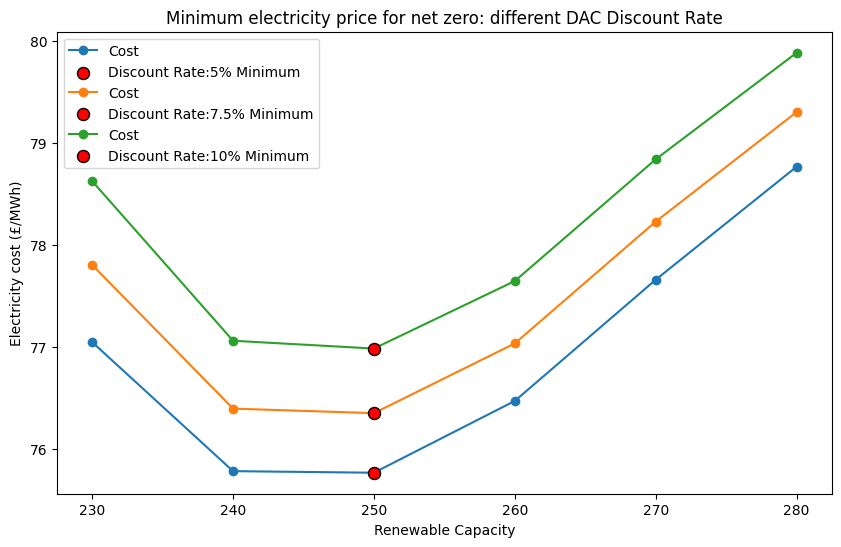

In [36]:
# Net zero 101 & discount rate 7.5%
df = zero_101_dis7
min_idx = df.groupby('Unnamed: 2')['5000'].idxmin()
zero_101_red_dis7 = df.loc[min_idx].reset_index(drop=True)
# Net zero 101 & discount rate 10%
df = zero_101_dis10
min_idx = df.groupby('Unnamed: 2')['5000'].idxmin()
zero_101_red_dis10 = df.loc[min_idx].reset_index(drop=True)



fig, ax1 = plt.subplots(figsize=((10,6)))
x = np.arange(230,290,10)

#Discount rate = 5%
ax1.plot(x,zero_101_red['5000'], marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = zero_101_red['5000']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Discount Rate:5% Minimum', zorder=1)

#Discount rate = 7.5%
ax1.plot(x,zero_101_red_dis7['5000'], marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = zero_101_red_dis7['5000']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Discount Rate:7.5% Minimum', zorder=1)

#Discount rate = 10%
ax1.plot(x,zero_101_red_dis10['5000'], marker='o', label='Cost', zorder=0) # Cost
#Highlight minimum
y_values = zero_101_red_dis10['5000']
min_index = np.argmin(y_values)
min_x, min_y = x[min_index], y_values[min_index]
plt.scatter(min_x, min_y, color='red', s=75, marker='o', edgecolors='black', label='Discount Rate:10% Minimum', zorder=1)
ax1.set_xlabel('Renewable Capacity')
ax1.set_ylabel('Electricity cost (£/MWh)')
ax1.legend()#loc = 'upper left')
ax1.set_title('Minimum electricity price for net zero: different DAC Discount Rate')